### Table of contents
1. [Visualize co-expressed patterns of ISG expression across broad cell types](#1)
2. [Identify cell type-specific ISGs](#2)
    * 2a. [Myeloid](#2a)
    * 2b. [Tumor and stromal](#2b)
    * 2c. [T and NK cell](#2c)
    * 2d. [B cell and plasma cell](#2d)
    * 2e. [Identify non-ISG cell type-specific myeloid and tumor genes (negative control in clinical analyses)](#2e)
3. [Collect signatures and save for downstream use](#3)

In [1]:
library(harmony)
library(hacksig)
library(car)
library(corrplot)
library(ComplexHeatmap)
library(rstatix)
library(stringr)
library(Seurat)
library(useful)
library(dplyr)
library(ggpubr)
library(ggrepel)
library(glue)
library(RColorBrewer)
library(ggpubr)
library(ggrepel)
library(reshape2)
library(lmerTest)
library(Scillus)
library(cowplot)
library(viridis)
library(hrbrthemes)
library(ggridges)
library(pheatmap)
library(ggplot2)
library(magrittr)
library(broom)
library(yarrr)

set.seed(1234)

options(repr.plot.width=12, repr.plot.height=9)

Loading required package: Rcpp

Loading required package: carData

corrplot 0.92 loaded

Loading required package: grid

ComplexHeatmap version 2.8.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))



Attaching package: 'rstatix'


The following object is masked from 'package:stats':

    filter


Attaching SeuratObject

Attaching sp

Loading required package: ggplot2


Attaching package: 'dplyr'


The following object is masked from 'package:car

### Visualize co-expressed patterns of ISG expression across broad cell types <a name="1"></a>

### We calculate a correlation matrix using average expression within each cell type from each sample, computing pearson correlation in the space of putative ISGs

In [2]:
seur_full_notx_allstages = readRDS("../Data_Objects/seur_full_BBK_notx_allstages_No_Omitted_Contam_Manuscript.RDS")
Idents(seur_full_notx_allstages) = "BBK_Broad_Celltype_DE"

goi = readRDS("../Signatures/manuscript_goi_hallmark_benciminn_curated.RDS")
length(goi)
length(unique(goi))

[1] 259

[1] 259

In [3]:
Idents(seur_full_notx_allstages) = "BBK_Broad_Celltype_DE"
seur_full_notx_allstages = RenameIdents(seur_full_notx_allstages,"Perivascular_and_Fibroblast"="Perivascular.and.Fibroblast")
Idents(seur_full_notx_allstages) = factor(Idents(seur_full_notx_allstages), levels = c("Tumor","Perivascular.and.Fibroblast","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))
seur_full_notx_allstages$BBK_Broad_Celltype_DE = Idents(seur_full_notx_allstages)

table(Idents(seur_full_notx_allstages))
table(seur_full_notx_allstages$BBK_Broad_Celltype_DE)


                      Tumor Perivascular.and.Fibroblast 
                      12921                         786 
                Endothelial                         TAM 
                       1127                       13929 
                   Monocyte                          DC 
                      11243                        2580 
                        CD8                 CD8 NK-like 
                      51211                       10928 
                         NK                    T-Helper 
                      17431                       14026 
                      T-reg                      B cell 
                       5106                        1592 
                Plasma cell 
                        501 


                      Tumor Perivascular.and.Fibroblast 
                      12921                         786 
                Endothelial                         TAM 
                       1127                       13929 
                   Monocyte                          DC 
                      11243                        2580 
                        CD8                 CD8 NK-like 
                      51211                       10928 
                         NK                    T-Helper 
                      17431                       14026 
                      T-reg                      B cell 
                       5106                        1592 
                Plasma cell 
                        501 

### Make cluster averages object

Centering and scaling data matrix



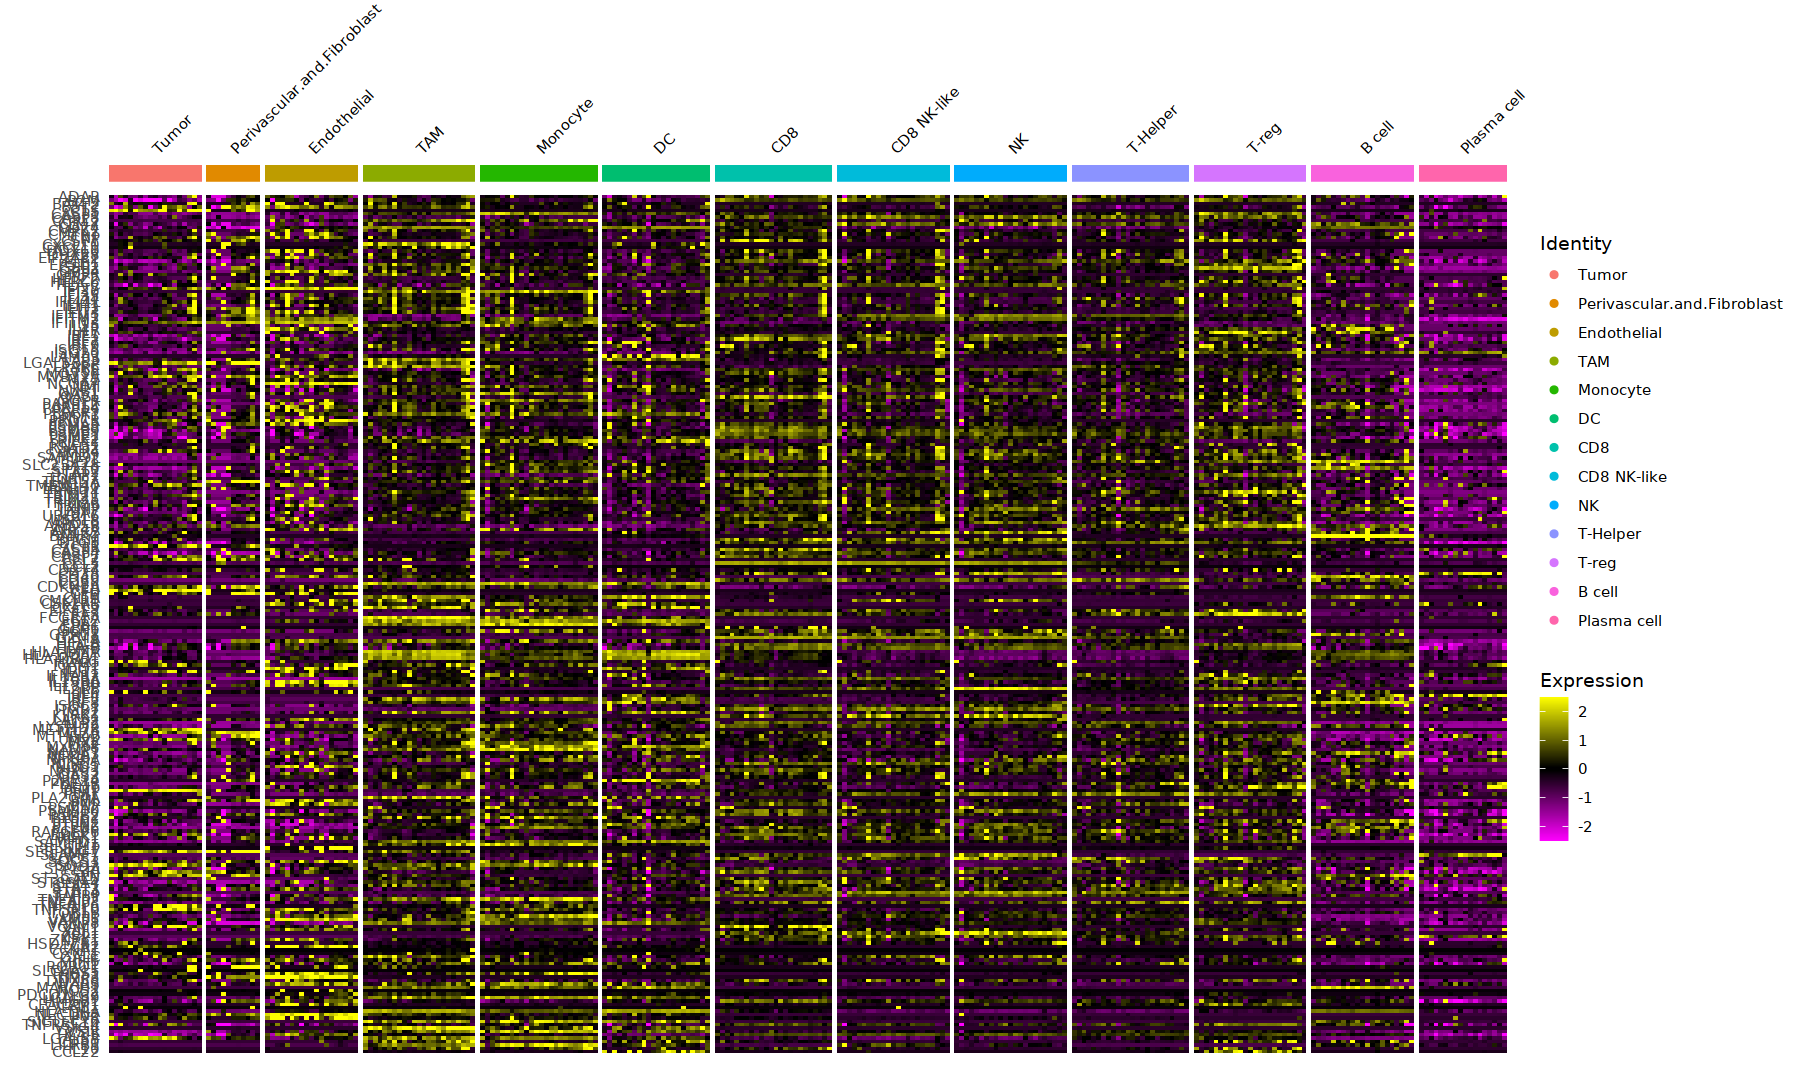

In [8]:
options(repr.plot.width=15, repr.plot.height=9)

seur_full_notx_allstages$Sample = factor(seur_full_notx_allstages$Sample)
seur_full_notx_allstages$Cohort = factor(seur_full_notx_allstages$Cohort)

cluster.averages <- AverageExpression(seur_full_notx_allstages, return.seurat = TRUE, group.by = c("BBK_Broad_Celltype_DE","Sample"))
Idents(cluster.averages) = factor(Idents(cluster.averages), levels = levels(Idents(seur_full_notx_allstages)))

DoHeatmap(cluster.averages, features = intersect(goi, row.names(seur_full_notx_allstages@assays$RNA@data)), size = 3, 
    draw.lines = TRUE)

In [9]:
cluster.averages_data = cluster.averages@assays$RNA@data
head(cluster.averages_data)
dim(cluster.averages_data)

,Tumor_5pool1_2,Tumor_Bi_0600916_T1,Tumor_Bi_DFCI_0600876_T1,Tumor_Bi_DFCI_0600890_T1,Tumor_Pool70-10,Tumor_Pool70-6,Tumor_Pool71-5,Tumor_Pool71-6,Tumor_Pool72-2,Tumor_Pool72-4,...,Plasma cell_Pool72-2,Plasma cell_Pool72-4,Plasma cell_Pool73-3,Plasma cell_Pool73-4,Plasma cell_Pool73-5,Plasma cell_Pool73-6,Plasma cell_UT1_Center,Plasma cell_UT1_Lower,Plasma cell_UT1_Upper,Plasma cell_UT2_Far
WASH7P,0.000000000,0,0.00000000,0.0000000000,0,0,0.0000000000,0,0.0000000,0,...,0,0,0,0,0,0,0,0,0.00000000,0
MIR1302-2HG,0.027869843,0,0.00000000,0.0000000000,0,0,0.0010942676,0,0.0000000,0,...,0,0,0,0,0,0,0,0,0.00000000,0
AL627309.1,0.004613623,0,0.00956156,0.0037214542,0,0,0.0011177273,0,0.0622975,0,...,0,0,0,0,0,0,0,0,0.00000000,0
AL627309.3,0.000000000,0,0.00000000,0.0001791180,0,0,0.0000000000,0,0.0000000,0,...,0,0,0,0,0,0,0,0,0.00000000,0
CICP27,0.000000000,0,0.02446755,0.0003763574,0,0,0.0000000000,0,0.0000000,0,...,0,0,0,0,0,0,0,0,0.00000000,0
AL627309.1.1,0.060202925,0,0.01236929,0.0540938391,0,0,0.0009195311,0,0.0000000,0,...,0,0,0,0,0,0,0,0,0.02809489,0


[1] 39619   274

In [10]:
cluster.averages_data_goi = cluster.averages_data[intersect(row.names(cluster.averages_data),goi),]
head(cluster.averages_data_goi)
dim(cluster.averages_data_goi)

,Tumor_5pool1_2,Tumor_Bi_0600916_T1,Tumor_Bi_DFCI_0600876_T1,Tumor_Bi_DFCI_0600890_T1,Tumor_Pool70-10,Tumor_Pool70-6,Tumor_Pool71-5,Tumor_Pool71-6,Tumor_Pool72-2,Tumor_Pool72-4,...,Plasma cell_Pool72-2,Plasma cell_Pool72-4,Plasma cell_Pool73-3,Plasma cell_Pool73-4,Plasma cell_Pool73-5,Plasma cell_Pool73-6,Plasma cell_UT1_Center,Plasma cell_UT1_Lower,Plasma cell_UT1_Upper,Plasma cell_UT2_Far
ISG15,0.202469968,0.00000000,0.1369877,0.43756534,0.3422224,0.038533597,0.208425455,0.07213809,0.01645745,0.28774840,...,0.1518522,0.1305325,0.99777862,0.72293378,0.96829632,0.2795907,0.3244663,0.1053605,0.3447328,0.8408986
TNFRSF14,1.688752192,0.05057712,1.6062269,0.56882898,0.4887659,0.986116807,0.525001783,0.12671691,1.21567421,1.01206007,...,0.8721947,0.5726261,0.25088589,0.47305864,0.44760858,0.3974118,0.5967449,0.3158075,0.6661219,0.3642841
IFI6,0.782241349,0.00000000,0.1440692,1.15354607,0.1535170,0.453949206,0.639204804,0.34327730,0.12862259,0.52192527,...,0.3524788,0.3617661,0.25871792,0.77919326,0.87827322,0.5308930,0.3050942,0.3709407,0.2647255,2.6593196
PSMB2,0.779593332,0.00000000,0.3001543,0.78653234,0.6521086,0.628842416,0.729673771,0.57327110,0.93273185,0.77109725,...,0.3983040,0.6987122,0.56632909,0.35430263,0.67112581,0.5211489,0.1822927,0.2056627,0.3652252,0.0000000
PDE4B,0.002410895,0.00000000,0.0209006,0.04902722,0.0000000,0.003230244,0.004898643,0.00000000,0.18543168,0.05887746,...,0.8857365,0.0000000,0.29789187,0.24367471,0.01621349,0.4062997,1.0620973,0.8042118,1.4254596,2.3237147
IFI44L,0.125185814,0.00000000,0.9648078,0.49711668,0.2556849,0.099677425,0.050684311,0.04863271,0.01453489,0.10533803,...,0.0000000,0.0000000,0.09216997,0.03374938,0.00000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


[1] 253 274

In [11]:
M = cor(cluster.averages_data_goi)
head(round(M,2))

,Tumor_5pool1_2,Tumor_Bi_0600916_T1,Tumor_Bi_DFCI_0600876_T1,Tumor_Bi_DFCI_0600890_T1,Tumor_Pool70-10,Tumor_Pool70-6,Tumor_Pool71-5,Tumor_Pool71-6,Tumor_Pool72-2,Tumor_Pool72-4,...,Plasma cell_Pool72-2,Plasma cell_Pool72-4,Plasma cell_Pool73-3,Plasma cell_Pool73-4,Plasma cell_Pool73-5,Plasma cell_Pool73-6,Plasma cell_UT1_Center,Plasma cell_UT1_Lower,Plasma cell_UT1_Upper,Plasma cell_UT2_Far
Tumor_5pool1_2,1.00,0.79,0.79,0.84,0.83,0.90,0.88,0.80,0.85,0.82,...,0.69,0.64,0.65,0.68,0.63,0.67,0.63,0.61,0.64,0.36
Tumor_Bi_0600916_T1,0.79,1.00,0.70,0.76,0.73,0.80,0.84,0.79,0.72,0.69,...,0.59,0.63,0.57,0.58,0.54,0.56,0.53,0.51,0.54,0.29
Tumor_Bi_DFCI_0600876_T1,0.79,0.70,1.00,0.70,0.78,0.76,0.75,0.67,0.73,0.78,...,0.63,0.65,0.61,0.62,0.60,0.62,0.62,0.61,0.62,0.37
Tumor_Bi_DFCI_0600890_T1,0.84,0.76,0.70,1.00,0.79,0.81,0.83,0.71,0.72,0.71,...,0.66,0.61,0.62,0.66,0.62,0.64,0.56,0.55,0.56,0.37
Tumor_Pool70-10,0.83,0.73,0.78,0.79,1.00,0.83,0.86,0.73,0.75,0.82,...,0.74,0.72,0.72,0.77,0.73,0.75,0.68,0.66,0.68,0.42
Tumor_Pool70-6,0.90,0.80,0.76,0.81,0.83,1.00,0.89,0.82,0.79,0.86,...,0.62,0.60,0.61,0.63,0.59,0.60,0.58,0.57,0.59,0.36


In [14]:
celltype_cols = readRDS(file = "../Data_Objects//celltype_cols.RDS")
celltype_cols

celltype_cols_DE = celltype_cols
names(celltype_cols_DE) = replace(names(celltype_cols_DE), names(celltype_cols_DE) == "Perivascular cell","Perivascular.and.Fibroblast")
celltype_cols_DE = celltype_cols_DE[unique(as.character(cluster.averages@meta.data$orig.ident))]
celltype_cols_DE["Perivascular.and.Fibroblast"] = "#766458"
celltype_cols_DE

Tumor               TAM               CD8       Plasma cell 
        "#A0BAAC"         "#7FC97F"         "#C2AFCE"         "#E4B9A3" 
               DC       Endothelial          T-Helper                NK 
        "#FDC988"         "#FEEB93"         "#D1DD9E"         "#658DAA" 
         Monocyte             T-reg            B cell       CD8 NK-like 
        "#704BA0"         "#D31286"         "#DD2456"         "#C2541E" 
       Fibroblast Perivascular cell            Contam           Omitted 
        "#95603B"         "#666666"          "grey95"          "grey95"

Tumor Perivascular.and.Fibroblast 
                  "#A0BAAC"                   "#766458" 
                Endothelial                         TAM 
                  "#FEEB93"                   "#7FC97F" 
                   Monocyte                          DC 
                  "#704BA0"                   "#FDC988" 
                        CD8                 CD8 NK-like 
                  "#C2AFCE"                   "#C2541E" 
                         NK                    T-Helper 
                  "#658DAA"                   "#D1DD9E" 
                      T-reg                      B cell 
                  "#D31286"                   "#DD2456" 
                Plasma cell 
                  "#E4B9A3"

In [15]:
celltype_cols_DE_df = data.frame(celltype_cols_DE)
celltype_cols_DE_df$orig.ident = row.names(celltype_cols_DE_df)
celltype_cols_DE_df

,celltype_cols_DE,orig.ident
,<chr>,<chr>
Tumor,#A0BAAC,Tumor
Perivascular.and.Fibroblast,#766458,Perivascular.and.Fibroblast
Endothelial,#FEEB93,Endothelial
TAM,#7FC97F,TAM
Monocyte,#704BA0,Monocyte
DC,#FDC988,DC
CD8,#C2AFCE,CD8
CD8 NK-like,#C2541E,CD8 NK-like
NK,#658DAA,NK


In [16]:
meta = cluster.averages@meta.data
meta = left_join(meta, celltype_cols_DE_df, by = "orig.ident")
meta$orig.ident= factor(meta$orig.ident, levels = c("Tumor","Perivascular.and.Fibroblast","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))
head(meta)

,orig.ident,nCount_RNA,nFeature_RNA,celltype_cols_DE
,<fct>,<dbl>,<int>,<chr>
1,Tumor,10000,18069,#A0BAAC
2,Tumor,10000,3093,#A0BAAC
3,Tumor,10000,21445,#A0BAAC
4,Tumor,10000,25586,#A0BAAC
5,Tumor,10000,12026,#A0BAAC
6,Tumor,10000,16561,#A0BAAC


In [17]:
column_ha = HeatmapAnnotation(BBK_Broad_Celltype_DE = meta$orig.ident,col = list(BBK_Broad_Celltype_DE = celltype_cols_DE))
row_ha = rowAnnotation(BBK_Broad_Celltype_DE = meta$orig.ident,col = list(BBK_Broad_Celltype_DE = celltype_cols_DE))

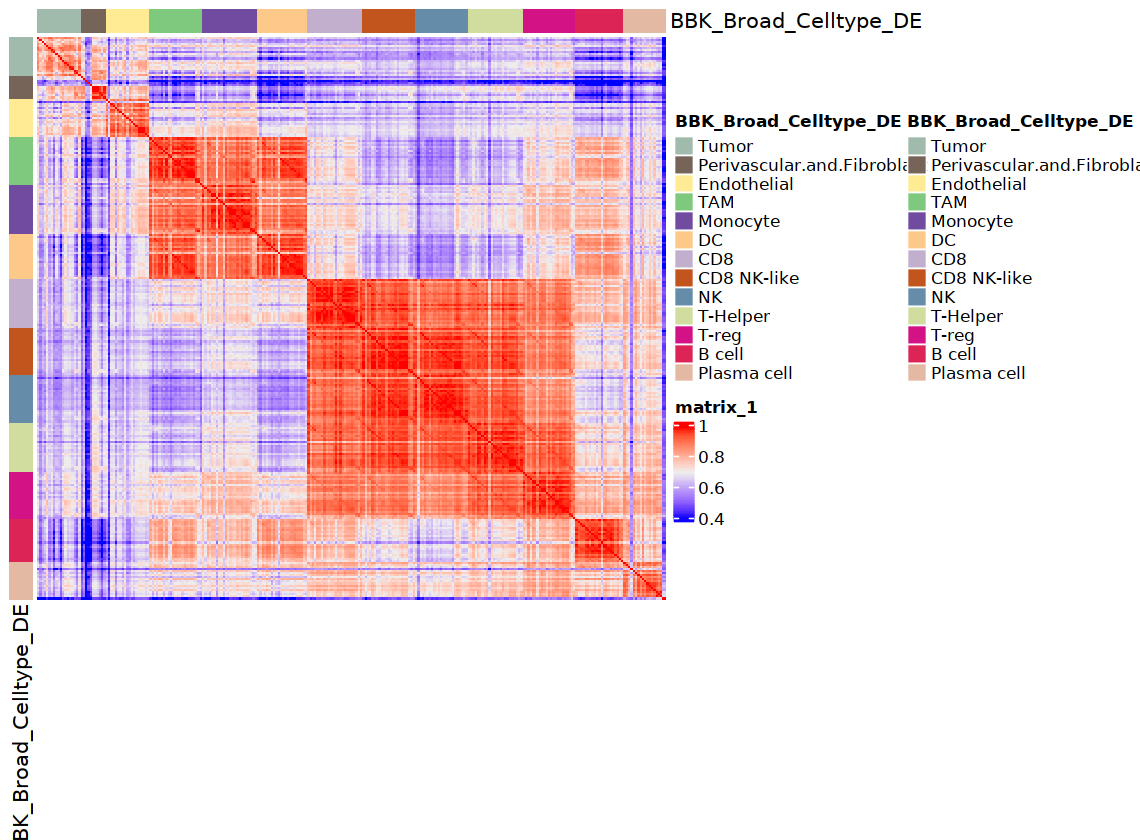

In [18]:
options(repr.plot.width=9.5, repr.plot.height=7)

ht = Heatmap(M,top_annotation = column_ha,left_annotation = row_ha,cluster_rows = F, cluster_columns = F,show_column_names = FALSE,show_row_names = FALSE)
ht

ggsave("../Figures/Figure3/Correlation_Heatmap_BBK_Broad_Celltype_DE.pdf", width = 9.5, height = 7)

### We also make this same correlation matrix but with perivascular cells and fibroblasts considered as separate entities

Centering and scaling data matrix



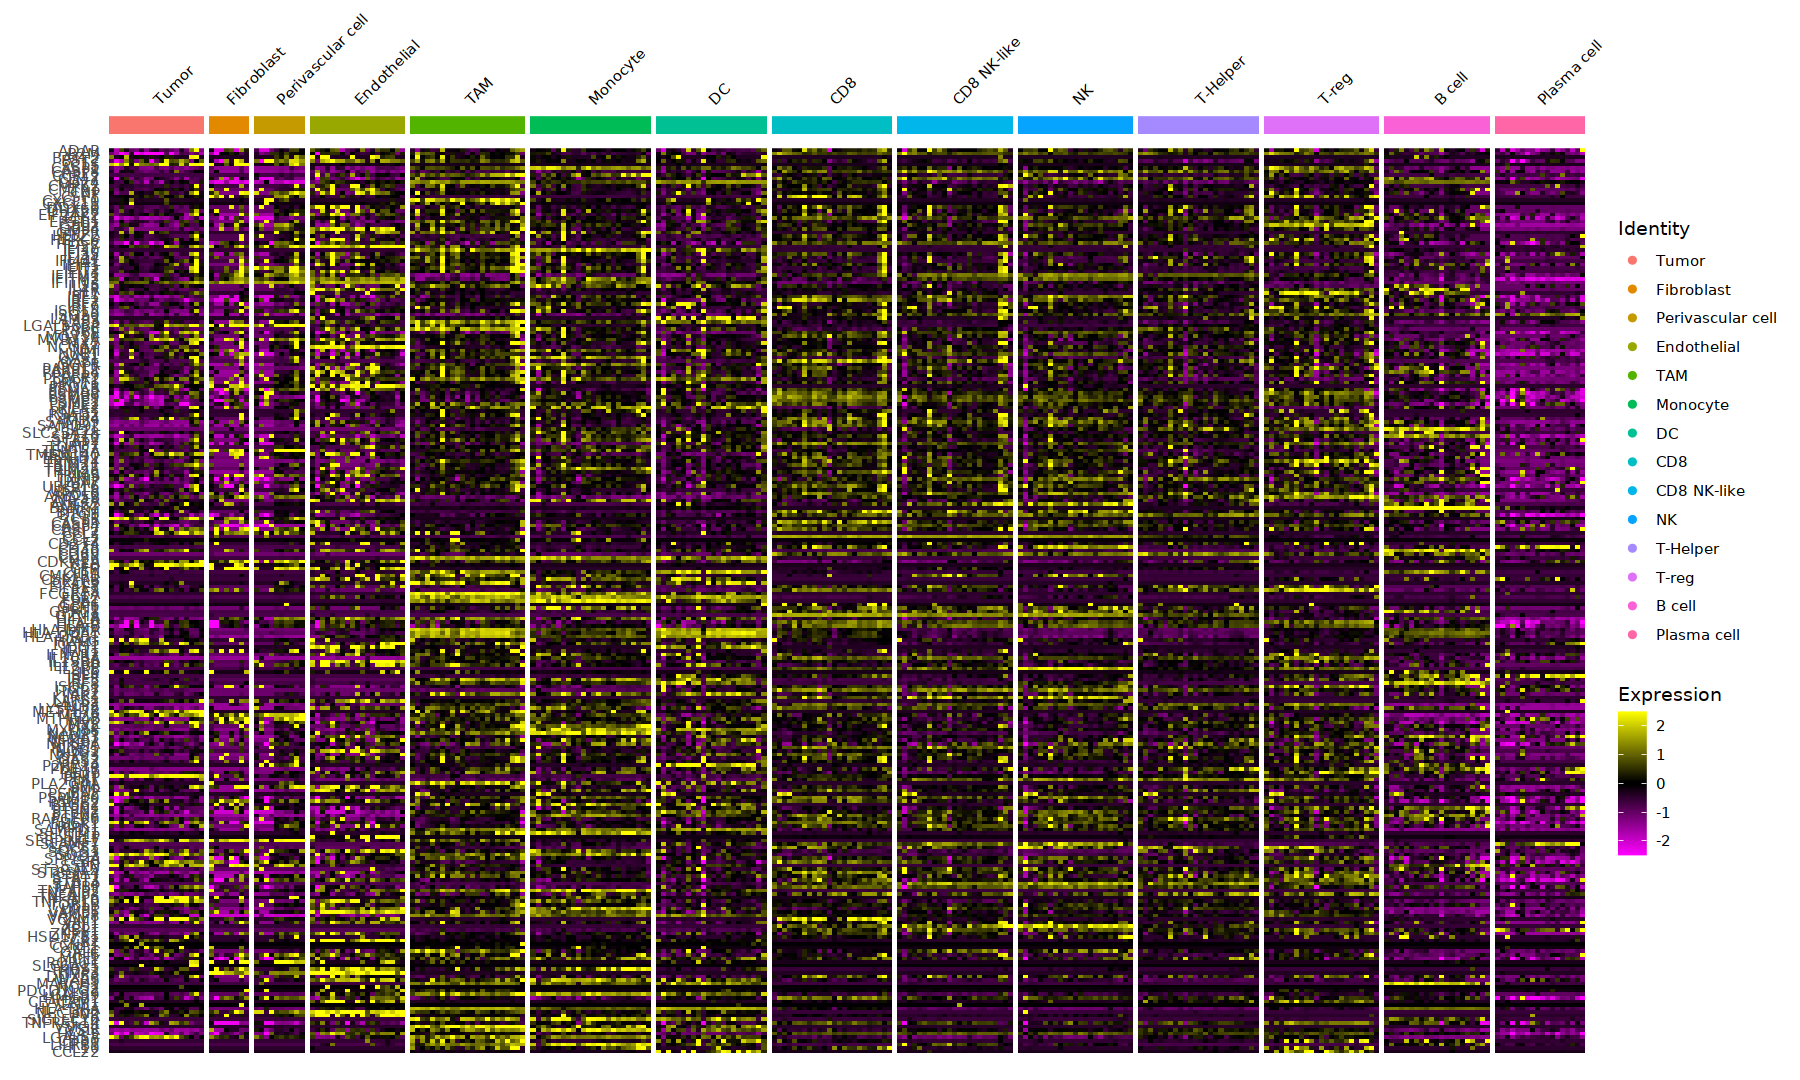

In [25]:
options(repr.plot.width=15, repr.plot.height=9)

seur_full_notx_allstages$BBK_Broad_Celltype = factor(seur_full_notx_allstages$BBK_Broad_Celltype, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))
Idents(seur_full_notx_allstages) = "BBK_Broad_Celltype"

seur_full_notx_allstages$Sample = factor(seur_full_notx_allstages$Sample)
seur_full_notx_allstages$Cohort = factor(seur_full_notx_allstages$Cohort)

cluster.averages <- AverageExpression(seur_full_notx_allstages, return.seurat = TRUE, group.by = c("BBK_Broad_Celltype","Sample"))
Idents(cluster.averages) = factor(Idents(cluster.averages), levels = levels(Idents(seur_full_notx_allstages)))

DoHeatmap(cluster.averages, features = intersect(goi, row.names(seur_full_notx_allstages@assays$RNA@data)), size = 3, 
    draw.lines = TRUE)

In [26]:
cluster.averages_data = cluster.averages@assays$RNA@data
head(cluster.averages_data)
dim(cluster.averages_data)

cluster.averages_data_goi = cluster.averages_data[intersect(row.names(cluster.averages_data),goi),]
head(cluster.averages_data_goi)
dim(cluster.averages_data_goi)

M = cor(cluster.averages_data_goi)
head(round(M,2))

,Tumor_5pool1_2,Tumor_Bi_0600916_T1,Tumor_Bi_DFCI_0600876_T1,Tumor_Bi_DFCI_0600890_T1,Tumor_Pool70-10,Tumor_Pool70-6,Tumor_Pool71-5,Tumor_Pool71-6,Tumor_Pool72-2,Tumor_Pool72-4,...,Plasma cell_Pool72-2,Plasma cell_Pool72-4,Plasma cell_Pool73-3,Plasma cell_Pool73-4,Plasma cell_Pool73-5,Plasma cell_Pool73-6,Plasma cell_UT1_Center,Plasma cell_UT1_Lower,Plasma cell_UT1_Upper,Plasma cell_UT2_Far
WASH7P,0.000000000,0,0.00000000,0.0000000000,0,0,0.0000000000,0,0.0000000,0,...,0,0,0,0,0,0,0,0,0.00000000,0
MIR1302-2HG,0.027869843,0,0.00000000,0.0000000000,0,0,0.0010942676,0,0.0000000,0,...,0,0,0,0,0,0,0,0,0.00000000,0
AL627309.1,0.004613623,0,0.00956156,0.0037214542,0,0,0.0011177273,0,0.0622975,0,...,0,0,0,0,0,0,0,0,0.00000000,0
AL627309.3,0.000000000,0,0.00000000,0.0001791180,0,0,0.0000000000,0,0.0000000,0,...,0,0,0,0,0,0,0,0,0.00000000,0
CICP27,0.000000000,0,0.02446755,0.0003763574,0,0,0.0000000000,0,0.0000000,0,...,0,0,0,0,0,0,0,0,0.00000000,0
AL627309.1.1,0.060202925,0,0.01236929,0.0540938391,0,0,0.0009195311,0,0.0000000,0,...,0,0,0,0,0,0,0,0,0.02809489,0


[1] 39619   281

,Tumor_5pool1_2,Tumor_Bi_0600916_T1,Tumor_Bi_DFCI_0600876_T1,Tumor_Bi_DFCI_0600890_T1,Tumor_Pool70-10,Tumor_Pool70-6,Tumor_Pool71-5,Tumor_Pool71-6,Tumor_Pool72-2,Tumor_Pool72-4,...,Plasma cell_Pool72-2,Plasma cell_Pool72-4,Plasma cell_Pool73-3,Plasma cell_Pool73-4,Plasma cell_Pool73-5,Plasma cell_Pool73-6,Plasma cell_UT1_Center,Plasma cell_UT1_Lower,Plasma cell_UT1_Upper,Plasma cell_UT2_Far
ISG15,0.202469968,0.00000000,0.1369877,0.43756534,0.3422224,0.038533597,0.208425455,0.07213809,0.01645745,0.28774840,...,0.1518522,0.1305325,0.99777862,0.72293378,0.96829632,0.2795907,0.3244663,0.1053605,0.3447328,0.8408986
TNFRSF14,1.688752192,0.05057712,1.6062269,0.56882898,0.4887659,0.986116807,0.525001783,0.12671691,1.21567421,1.01206007,...,0.8721947,0.5726261,0.25088589,0.47305864,0.44760858,0.3974118,0.5967449,0.3158075,0.6661219,0.3642841
IFI6,0.782241349,0.00000000,0.1440692,1.15354607,0.1535170,0.453949206,0.639204804,0.34327730,0.12862259,0.52192527,...,0.3524788,0.3617661,0.25871792,0.77919326,0.87827322,0.5308930,0.3050942,0.3709407,0.2647255,2.6593196
PSMB2,0.779593332,0.00000000,0.3001543,0.78653234,0.6521086,0.628842416,0.729673771,0.57327110,0.93273185,0.77109725,...,0.3983040,0.6987122,0.56632909,0.35430263,0.67112581,0.5211489,0.1822927,0.2056627,0.3652252,0.0000000
PDE4B,0.002410895,0.00000000,0.0209006,0.04902722,0.0000000,0.003230244,0.004898643,0.00000000,0.18543168,0.05887746,...,0.8857365,0.0000000,0.29789187,0.24367471,0.01621349,0.4062997,1.0620973,0.8042118,1.4254596,2.3237147
IFI44L,0.125185814,0.00000000,0.9648078,0.49711668,0.2556849,0.099677425,0.050684311,0.04863271,0.01453489,0.10533803,...,0.0000000,0.0000000,0.09216997,0.03374938,0.00000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


[1] 253 281

,Tumor_5pool1_2,Tumor_Bi_0600916_T1,Tumor_Bi_DFCI_0600876_T1,Tumor_Bi_DFCI_0600890_T1,Tumor_Pool70-10,Tumor_Pool70-6,Tumor_Pool71-5,Tumor_Pool71-6,Tumor_Pool72-2,Tumor_Pool72-4,...,Plasma cell_Pool72-2,Plasma cell_Pool72-4,Plasma cell_Pool73-3,Plasma cell_Pool73-4,Plasma cell_Pool73-5,Plasma cell_Pool73-6,Plasma cell_UT1_Center,Plasma cell_UT1_Lower,Plasma cell_UT1_Upper,Plasma cell_UT2_Far
Tumor_5pool1_2,1.00,0.79,0.79,0.84,0.83,0.90,0.88,0.80,0.85,0.82,...,0.69,0.64,0.65,0.68,0.63,0.67,0.63,0.61,0.64,0.36
Tumor_Bi_0600916_T1,0.79,1.00,0.70,0.76,0.73,0.80,0.84,0.79,0.72,0.69,...,0.59,0.63,0.57,0.58,0.54,0.56,0.53,0.51,0.54,0.29
Tumor_Bi_DFCI_0600876_T1,0.79,0.70,1.00,0.70,0.78,0.76,0.75,0.67,0.73,0.78,...,0.63,0.65,0.61,0.62,0.60,0.62,0.62,0.61,0.62,0.37
Tumor_Bi_DFCI_0600890_T1,0.84,0.76,0.70,1.00,0.79,0.81,0.83,0.71,0.72,0.71,...,0.66,0.61,0.62,0.66,0.62,0.64,0.56,0.55,0.56,0.37
Tumor_Pool70-10,0.83,0.73,0.78,0.79,1.00,0.83,0.86,0.73,0.75,0.82,...,0.74,0.72,0.72,0.77,0.73,0.75,0.68,0.66,0.68,0.42
Tumor_Pool70-6,0.90,0.80,0.76,0.81,0.83,1.00,0.89,0.82,0.79,0.86,...,0.62,0.60,0.61,0.63,0.59,0.60,0.58,0.57,0.59,0.36


In [27]:
celltype_cols = readRDS(file = "../Data_Objects/celltype_cols.RDS")
celltype_cols

celltype_cols_DE = celltype_cols

celltype_cols_DE = celltype_cols_DE[unique(as.character(cluster.averages@meta.data$orig.ident))]

celltype_cols_DE

Tumor               TAM               CD8       Plasma cell 
        "#A0BAAC"         "#7FC97F"         "#C2AFCE"         "#E4B9A3" 
               DC       Endothelial          T-Helper                NK 
        "#FDC988"         "#FEEB93"         "#D1DD9E"         "#658DAA" 
         Monocyte             T-reg            B cell       CD8 NK-like 
        "#704BA0"         "#D31286"         "#DD2456"         "#C2541E" 
       Fibroblast Perivascular cell            Contam           Omitted 
        "#95603B"         "#666666"          "grey95"          "grey95"

Tumor        Fibroblast Perivascular cell       Endothelial 
        "#A0BAAC"         "#95603B"         "#666666"         "#FEEB93" 
              TAM          Monocyte                DC               CD8 
        "#7FC97F"         "#704BA0"         "#FDC988"         "#C2AFCE" 
      CD8 NK-like                NK          T-Helper             T-reg 
        "#C2541E"         "#658DAA"         "#D1DD9E"         "#D31286" 
           B cell       Plasma cell 
        "#DD2456"         "#E4B9A3"

In [28]:
celltype_cols_DE_df = data.frame(celltype_cols_DE)
celltype_cols_DE_df$orig.ident = row.names(celltype_cols_DE_df)
celltype_cols_DE_df

,celltype_cols_DE,orig.ident
,<chr>,<chr>
Tumor,#A0BAAC,Tumor
Fibroblast,#95603B,Fibroblast
Perivascular cell,#666666,Perivascular cell
Endothelial,#FEEB93,Endothelial
TAM,#7FC97F,TAM
Monocyte,#704BA0,Monocyte
DC,#FDC988,DC
CD8,#C2AFCE,CD8
CD8 NK-like,#C2541E,CD8 NK-like


In [29]:
meta = cluster.averages@meta.data
meta = left_join(meta, celltype_cols_DE_df, by = "orig.ident")
meta$orig.ident= factor(meta$orig.ident, levels = c("Tumor","Fibroblast","Perivascular cell","Endothelial","TAM","Monocyte","DC","CD8","CD8 NK-like","NK","T-Helper","T-reg","B cell","Plasma cell"))
head(meta)

,orig.ident,nCount_RNA,nFeature_RNA,celltype_cols_DE
,<fct>,<dbl>,<int>,<chr>
1,Tumor,10000,18069,#A0BAAC
2,Tumor,10000,3093,#A0BAAC
3,Tumor,10000,21445,#A0BAAC
4,Tumor,10000,25586,#A0BAAC
5,Tumor,10000,12026,#A0BAAC
6,Tumor,10000,16561,#A0BAAC


In [30]:
column_ha = HeatmapAnnotation(BBK_Broad_Celltype = meta$orig.ident,col = list(BBK_Broad_Celltype = celltype_cols_DE))
row_ha = rowAnnotation(BBK_Broad_Celltype = meta$orig.ident,col = list(BBK_Broad_Celltype = celltype_cols_DE))

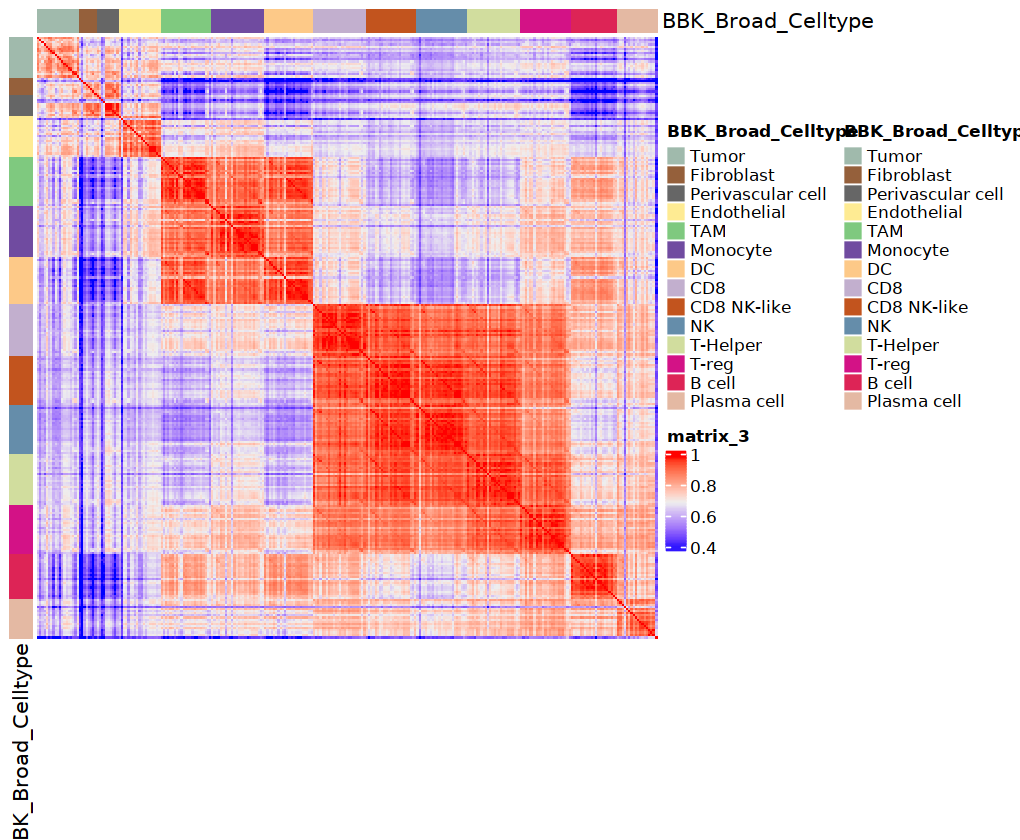

In [31]:
options(repr.plot.width=8.5, repr.plot.height=7)

ht = Heatmap(M,top_annotation = column_ha,left_annotation = row_ha,cluster_rows = F, cluster_columns = F,show_column_names = FALSE,show_row_names = FALSE)
ht

ggsave("../Figures/Figure3/Correlation_Heatmap_BBK_Broad_Celltype.pdf", width = 8.5, height = 7)

### Identify cell type-specific ISGs

### For each grouping (myeloid, tumor/stromal, T and NK, B cell), we identify cell type-specific ISGs in two steps:
#### 1. Cell type specificity analysis: Perform one versus each DE between broad cell types (ie TAM) and each other cell type. Comparisons with other cell types in the grouping will be ignored due to similarity in ISG expression. For a gene to be called as cell type specific, it must pass the following cutoffs {p_val_adj < 0.05 & avg_log2FC > 0 & diff > 0 & pct.2 < 0.2} in all considered comparisons.

#### 2. IFN inducibility analysis: Within broad cell types of a group, a gene must be significantly IFN1 or IFNG inducible as inferred by the mixed effects model approach.  {IFN1_resp_beta > 0 & IFN1_resp_p_adj < 0.01} or {IFNG_resp_beta > 0 & IFNG_resp_p_adj < 0.01}

### First, we retrieve type I and type II inducibility inferrence outputs from the mixed effects models

In [5]:
seur_full_notx_allstages = readRDS("../Data_Objects/seur_full_BBK_notx_allstages_No_Omitted_Contam_Manuscript.RDS")
Idents(seur_full_notx_allstages) = "BBK_Broad_Celltype_DE"

goi = readRDS("../Signatures/manuscript_goi_hallmark_benciminn_curated.RDS")
length(goi)
length(unique(goi))

celltypes = unique(as.character(Idents(seur_full_notx_allstages)))
celltypes

type1_isg = list()
type2_isg = list()

for (i in 1:length(celltypes)) {
    lmres = readRDS(paste("../Outputs/Manuscript_MixedEffects_Output_Stage_Corrected_EarlyLate/",celltypes[i],"_CytoSig_MixedEffects_Patient_Stage_Corrected_EarlyLate_Vargenes.RDS", sep = ""))
    lmres_sub = subset(lmres, gene %in% goi)
    
    type1_isg[[i]] = subset(lmres_sub, IFN1_resp_beta > 0 & IFN1_resp_p_adj_BH < 0.01)$gene
    type2_isg[[i]] = subset(lmres_sub, IFNG_resp_beta > 0 & IFNG_resp_p_adj_BH < 0.01)$gene
}

names(type1_isg) = celltypes
names(type2_isg) = celltypes

[1] 259

[1] 259

[1] "Tumor"                       "Monocyte"                   
 [3] "TAM"                         "CD8"                        
 [5] "Plasma cell"                 "CD8 NK-like"                
 [7] "DC"                          "Endothelial"                
 [9] "T-reg"                       "NK"                         
[11] "T-Helper"                    "B cell"                     
[13] "Perivascular_and_Fibroblast"

In [6]:
setdiff(type1_isg$TAM,type1_isg$Tumor)
setdiff(type1_isg$Tumor,type1_isg$TAM)

[1] "B2M"     "CD47"    "CXCL10"  "IFI30"   "IRF2"    "LAP3"    "LPAR6"  
 [8] "NCOA7"   "PSMA3"   "CASP3"   "CASP7"   "CCL2"    "CCL7"    "CMKLR1" 
[15] "EIF4E3"  "FAS"     "FCGR1A"  "GCH1"    "HIF1A"   "IL15RA"  "NOD1"   
[22] "SECTM1"  "SPPL2A"  "ST3GAL5" "ST8SIA4" "STAT4"   "TOR1B"   "TIMP3"  
[29] "VSIG4"   "LGALS3"  "LILRB1"  "IL10"

[1] "HLA-C"   "IL7"     "PSMB9"   "RIPK2"   "TAP1"    "BTG1"    "C1R"    
 [8] "CD274"   "CDKN1A"  "CFH"     "LATS2"   "NCOA3"   "PELI1"   "PFKP"   
[15] "PTGS2"   "PTPN6"   "SAMHD1"  "STAT3"   "TAPBP"   "TNFAIP6" "VCAM1"  
[22] "MCL1"    "SLC6A15" "HMGB1"   "CEACAM1" "NECTIN2"

### Myeloid <a name="2a"></a>

In [7]:
myeloid_dropped_comparisons = c("TAM","Monocyte","DC")

In [8]:
drop = myeloid_dropped_comparisons

#Get vector of cell types to consider in one vs each DE

celltypes_TAM = unique(as.character(Idents(seur_full_notx_allstages)))
celltypes_TAM = subset(celltypes_TAM, !(celltypes_TAM %in% drop))
celltypes_TAM

#For each comparitor cell type, retrieve DE results and store genes signficantly enriched in TAM
TAM_cts = list()

for (i in 1:length(celltypes_TAM)){
    cts_de = readRDS(paste("../Outputs/Manuscript_CellTypeSpecific_DE_Output_Stage_Corrected_EarlyLate/TAM/TAM_vs_",celltypes_TAM[i],"_CellTypeSpecific_DE_Manuscript_Vargenes2000_LR_Patient_Stage_Corrected_EarlyLate.RDS",sep = ""))
    cts_de$diff = cts_de$pct.1 - cts_de$pct.2

    cts_de = subset(cts_de, p_val_adj < 0.05 & avg_log2FC > 0 & diff > 0 & pct.2 < 0.2)
    TAM_cts[[i]] = row.names(cts_de)    
}

names(TAM_cts) = celltypes_TAM

#Get final unified vector of cell type-specific genes
Reduced_TAM_cts = Reduce(intersect, TAM_cts)
#Reduced_TAM_cts

#Intersect these cell type-specific genes with type I and type II IFN inducible genes
TAM_IFN1 = intersect(Reduce(intersect, TAM_cts), type1_isg$TAM)
TAM_IFN1

TAM_IFNG = intersect(Reduce(intersect, TAM_cts), type2_isg$TAM)
TAM_IFNG

[1] "Tumor"                       "CD8"                        
 [3] "Plasma cell"                 "CD8 NK-like"                
 [5] "Endothelial"                 "T-reg"                      
 [7] "NK"                          "T-Helper"                   
 [9] "B cell"                      "Perivascular_and_Fibroblast"

[1] "IFI30"  "LPAR6"  "FCGR1A" "MYD88"  "VSIG4"  "LILRB1" "IL10"   "SECTM1"
 [9] "MX2"    "CXCL10"

[1] "CD86"     "FCGR1A"   "FPR1"     "MYD88"    "SIGLEC10" "LILRB1"  
 [7] "SECTM1"   "JAK2"     "CXCL10"   "CXCL9"    "TNFAIP2"  "PTGS2"   
[13] "IL15"

In [9]:
drop = myeloid_dropped_comparisons

#Get vector of cell types to consider in one vs each DE

celltypes_Monocyte = unique(as.character(Idents(seur_full_notx_allstages)))
celltypes_Monocyte = subset(celltypes_Monocyte, !(celltypes_Monocyte %in% drop))
celltypes_Monocyte

#For each comparitor cell type, retrieve DE results and store genes signficantly enriched in Monocyte
Monocyte_cts = list()

for (i in 1:length(celltypes_Monocyte)){
    cts_de = readRDS(paste("../Outputs/Manuscript_CellTypeSpecific_DE_Output_Stage_Corrected_EarlyLate/Monocyte/Monocyte_vs_",celltypes_Monocyte[i],"_CellTypeSpecific_DE_Manuscript_Vargenes2000_LR_Patient_Stage_Corrected_EarlyLate.RDS",sep = ""))
    cts_de$diff = cts_de$pct.1 - cts_de$pct.2

    cts_de = subset(cts_de, p_val_adj < 0.05 & avg_log2FC > 0 & diff > 0 & pct.2 < 0.2)
    Monocyte_cts[[i]] = row.names(cts_de)    
}

names(Monocyte_cts) = celltypes_Monocyte

#Get final unified vector of cell type-specific genes
Reduced_Monocyte_cts = Reduce(intersect, Monocyte_cts)
#Reduced_Monocyte_cts

#Intersect these cell type-specific genes with type I and type II IFN inducible genes
Monocyte_IFN1 = intersect(Reduce(intersect, Monocyte_cts), type1_isg$Monocyte)
Monocyte_IFN1

Monocyte_IFNG = intersect(Reduce(intersect, Monocyte_cts), type2_isg$Monocyte)
Monocyte_IFNG

[1] "Tumor"                       "CD8"                        
 [3] "Plasma cell"                 "CD8 NK-like"                
 [5] "Endothelial"                 "T-reg"                      
 [7] "NK"                          "T-Helper"                   
 [9] "B cell"                      "Perivascular_and_Fibroblast"

[1] "CD86"     "GCH1"     "MYD88"    "SIGLEC10" "VSIG4"    "LILRB1"   "MX2"

[1] "GCH1"     "MYD88"    "SIGLEC10" "LILRB1"   "SECTM1"   "MX2"      "JAK2"    
[8] "TNFAIP2"  "IL15"

In [10]:
drop = myeloid_dropped_comparisons

#Get vector of cell types to consider in one vs each DE

celltypes_DC = unique(as.character(Idents(seur_full_notx_allstages)))
celltypes_DC = subset(celltypes_DC, !(celltypes_DC %in% drop))
celltypes_DC

#For each comparitor cell type, retrieve DE results and store genes signficantly enriched in DC
DC_cts = list()

for (i in 1:length(celltypes_DC)){
    cts_de = readRDS(paste("../Outputs/Manuscript_CellTypeSpecific_DE_Output_Stage_Corrected_EarlyLate/DC/DC_vs_",celltypes_DC[i],"_CellTypeSpecific_DE_Manuscript_Vargenes2000_LR_Patient_Stage_Corrected_EarlyLate.RDS",sep = ""))
    cts_de$diff = cts_de$pct.1 - cts_de$pct.2

    cts_de = subset(cts_de, p_val_adj < 0.05 & avg_log2FC > 0 & diff > 0 & pct.2 < 0.2)
    DC_cts[[i]] = row.names(cts_de)    
}

names(DC_cts) = celltypes_DC

#Get final unified vector of cell type-specific genes
Reduced_DC_cts = Reduce(intersect, DC_cts)
#Reduced_DC_cts

#Intersect these cell type-specific genes with type I and type II IFN inducible genes
DC_IFN1 = intersect(Reduce(intersect, DC_cts), type1_isg$DC)
DC_IFN1

DC_IFNG = intersect(Reduce(intersect, DC_cts), type2_isg$DC)
DC_IFNG

[1] "Tumor"                       "CD8"                        
 [3] "Plasma cell"                 "CD8 NK-like"                
 [5] "Endothelial"                 "T-reg"                      
 [7] "NK"                          "T-Helper"                   
 [9] "B cell"                      "Perivascular_and_Fibroblast"

character(0)

[1] "FCGR1A" "JAK2"   "LAMP3"  "SECTM1" "NFKB1"  "IL15"

### Define myeloid type I and type II ISGs as the unique union across TAM, Monocyte, and DC

In [11]:
myeloid_IFN1 = unique(c(TAM_IFN1,Monocyte_IFN1,DC_IFN1))
myeloid_IFN1

myeloid_IFNG = unique(c(TAM_IFNG,Monocyte_IFNG,DC_IFNG))
myeloid_IFNG

[1] "IFI30"    "LPAR6"    "FCGR1A"   "MYD88"    "VSIG4"    "LILRB1"  
 [7] "IL10"     "SECTM1"   "MX2"      "CXCL10"   "CD86"     "GCH1"    
[13] "SIGLEC10"

[1] "CD86"     "FCGR1A"   "FPR1"     "MYD88"    "SIGLEC10" "LILRB1"  
 [7] "SECTM1"   "JAK2"     "CXCL10"   "CXCL9"    "TNFAIP2"  "PTGS2"   
[13] "IL15"     "GCH1"     "MX2"      "LAMP3"    "NFKB1"

### Tumor and stromal <a name="2b"></a>

In [12]:
tumor_dropped_comparisons = c("Tumor","Perivascular_and_Fibroblast")

In [13]:
drop = tumor_dropped_comparisons

#Get vector of cell types to consider in one vs each DE

celltypes_Tumor = unique(as.character(Idents(seur_full_notx_allstages)))
celltypes_Tumor = subset(celltypes_Tumor, !(celltypes_Tumor %in% drop))
celltypes_Tumor

#For each comparitor cell type, retrieve DE results and store genes signficantly enriched in Tumor
Tumor_cts = list()

for (i in 1:length(celltypes_Tumor)){
    cts_de = readRDS(paste("../Outputs/Manuscript_CellTypeSpecific_DE_Output_Stage_Corrected_EarlyLate/Tumor/Tumor_vs_",celltypes_Tumor[i],"_CellTypeSpecific_DE_Manuscript_Vargenes2000_LR_Patient_Stage_Corrected_EarlyLate.RDS",sep = ""))
    cts_de$diff = cts_de$pct.1 - cts_de$pct.2

    cts_de = subset(cts_de, p_val_adj < 0.05 & avg_log2FC > 0 & diff > 0 & pct.2 < 0.2)
    Tumor_cts[[i]] = row.names(cts_de)    
}

names(Tumor_cts) = celltypes_Tumor

#Get final unified vector of cell type-specific genes
Reduced_Tumor_cts = Reduce(intersect, Tumor_cts)
#Reduced_Tumor_cts

#Intersect these cell type-specific genes with type I and type II IFN inducible genes
Tumor_IFN1 = intersect(Reduce(intersect, Tumor_cts), type1_isg$Tumor)
Tumor_IFN1

Tumor_IFNG = intersect(Reduce(intersect, Tumor_cts), type2_isg$Tumor)
Tumor_IFNG

[1] "Monocyte"    "TAM"         "CD8"         "Plasma cell" "CD8 NK-like"
 [6] "DC"          "Endothelial" "T-reg"       "NK"          "T-Helper"   
[11] "B cell"

[1] "C1R"     "PFKP"    "TNFAIP6"

[1] "C1S"  "C1R"  "CFB"  "SSPN"

In [14]:
drop = tumor_dropped_comparisons

#Get vector of cell types to consider in one vs each DE

celltypes_Perivascular_and_Fibroblast = unique(as.character(Idents(seur_full_notx_allstages)))
celltypes_Perivascular_and_Fibroblast = subset(celltypes_Perivascular_and_Fibroblast, !(celltypes_Perivascular_and_Fibroblast %in% drop))
celltypes_Perivascular_and_Fibroblast

#For each comparitor cell type, retrieve DE results and store genes signficantly enriched in Perivascular_and_Fibroblast
Perivascular_and_Fibroblast_cts = list()

for (i in 1:length(celltypes_Perivascular_and_Fibroblast)){
    cts_de = readRDS(paste("../Outputs/Manuscript_CellTypeSpecific_DE_Output_Stage_Corrected_EarlyLate/Perivascular_and_Fibroblast/Perivascular_and_Fibroblast_vs_",celltypes_Perivascular_and_Fibroblast[i],"_CellTypeSpecific_DE_Manuscript_Vargenes2000_LR_Patient_Stage_Corrected_EarlyLate.RDS",sep = ""))
    cts_de$diff = cts_de$pct.1 - cts_de$pct.2

    cts_de = subset(cts_de, p_val_adj < 0.05 & avg_log2FC > 0 & diff > 0 & pct.2 < 0.2)
    Perivascular_and_Fibroblast_cts[[i]] = row.names(cts_de)    
}

names(Perivascular_and_Fibroblast_cts) = celltypes_Perivascular_and_Fibroblast

#Get final unified vector of cell type-specific genes
Reduced_Perivascular_and_Fibroblast_cts = Reduce(intersect, Perivascular_and_Fibroblast_cts)
#Reduced_Perivascular_and_Fibroblast_cts

#Intersect these cell type-specific genes with type I and type II IFN inducible genes
Perivascular_and_Fibroblast_IFN1 = intersect(Reduce(intersect, Perivascular_and_Fibroblast_cts), type1_isg$Perivascular_and_Fibroblast)
Perivascular_and_Fibroblast_IFN1

Perivascular_and_Fibroblast_IFNG = intersect(Reduce(intersect, Perivascular_and_Fibroblast_cts), type2_isg$Perivascular_and_Fibroblast)
Perivascular_and_Fibroblast_IFNG

[1] "Monocyte"    "TAM"         "CD8"         "Plasma cell" "CD8 NK-like"
 [6] "DC"          "Endothelial" "T-reg"       "NK"          "T-Helper"   
[11] "B cell"

character(0)

[1] "C1S"

### Define tumor and fibroblast ISGs as the unique union across Tumor and Perivascular_and_Fibroblast

In [15]:
tum_fib_IFN1 = unique(c(Tumor_IFN1,Perivascular_and_Fibroblast_IFN1))
tum_fib_IFN1

tum_fib_IFNG = unique(c(Tumor_IFNG,Perivascular_and_Fibroblast_IFNG))
tum_fib_IFNG

[1] "C1R"     "PFKP"    "TNFAIP6"

[1] "C1S"  "C1R"  "CFB"  "SSPN"

### Tumor ISGs are shared primarily with Fibroblasts

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



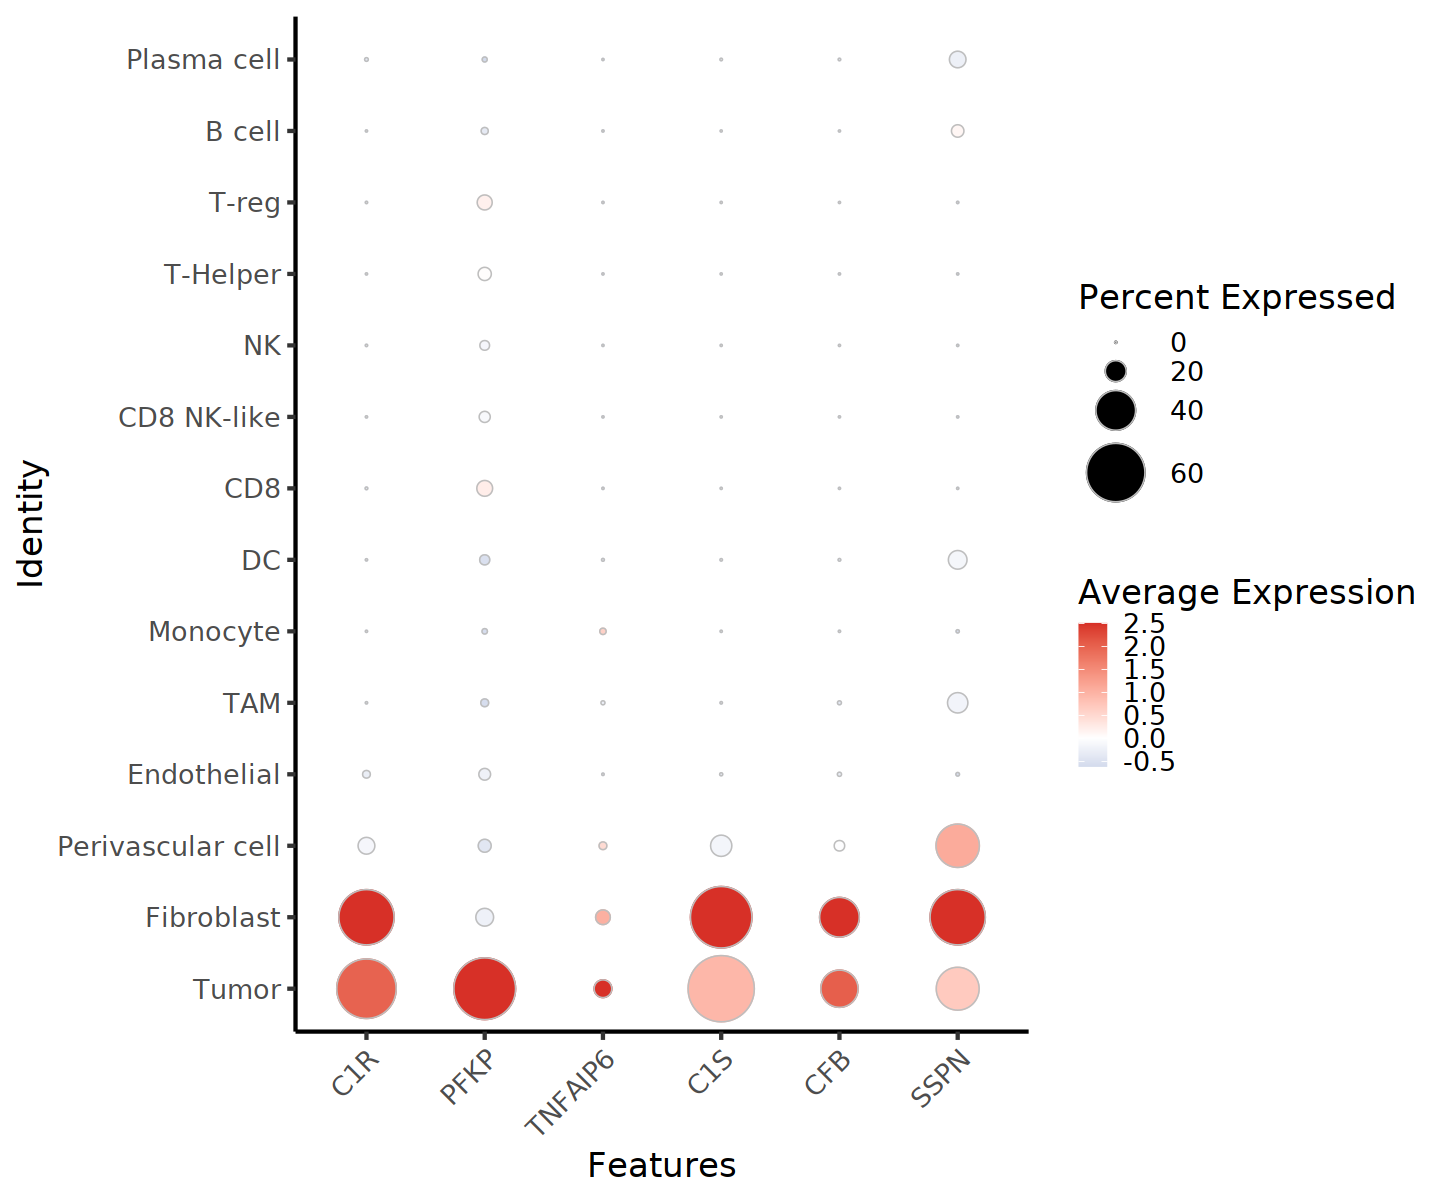

In [21]:
options(repr.plot.width=12, repr.plot.height=10)

DotPlot(seur_full_notx_allstages, features = unique(c(tum_fib_IFN1,tum_fib_IFNG)),group.by = "BBK_Broad_Celltype",assay = "RNA",dot.scale = 18, cols = c("white","red")) + theme_classic(base_size = 20) +
geom_point(aes(size = pct.exp),shape = 21, color = "grey",stroke = 0.5) + 
scale_colour_gradient2(low = "#4575b4", mid = "white", high = "#d73027") +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

In [17]:
endothelial_dropped_comparisons = c("Endothelial")

In [18]:
drop = endothelial_dropped_comparisons

#Get vector of cell types to consider in one vs each DE

celltypes_Endothelial = unique(as.character(Idents(seur_full_notx_allstages)))
celltypes_Endothelial = subset(celltypes_Endothelial, !(celltypes_Endothelial %in% drop))
celltypes_Endothelial

#For each comparitor cell type, retrieve DE results and store genes signficantly enriched in Endothelial
Endothelial_cts = list()

for (i in 1:length(celltypes_Endothelial)){
    cts_de = readRDS(paste("../Outputs/Manuscript_CellTypeSpecific_DE_Output_Stage_Corrected_EarlyLate/Endothelial/Endothelial_vs_",celltypes_Endothelial[i],"_CellTypeSpecific_DE_Manuscript_Vargenes2000_LR_Patient_Stage_Corrected_EarlyLate.RDS",sep = ""))
    cts_de$diff = cts_de$pct.1 - cts_de$pct.2

    cts_de = subset(cts_de, p_val_adj < 0.05 & avg_log2FC > 0 & diff > 0 & pct.2 < 0.2)
    Endothelial_cts[[i]] = row.names(cts_de)    
}

names(Endothelial_cts) = celltypes_Endothelial

#Get final unified vector of cell type-specific genes
Reduced_Endothelial_cts = Reduce(intersect, Endothelial_cts)
#Reduced_Endothelial_cts

#Intersect these cell type-specific genes with type I and type II IFN inducible genes
Endothelial_IFN1 = intersect(Reduce(intersect, Endothelial_cts), type1_isg$Endothelial)
Endothelial_IFN1

Endothelial_IFNG = intersect(Reduce(intersect, Endothelial_cts), type2_isg$Endothelial)
Endothelial_IFNG

[1] "Tumor"                       "Monocyte"                   
 [3] "TAM"                         "CD8"                        
 [5] "Plasma cell"                 "CD8 NK-like"                
 [7] "DC"                          "T-reg"                      
 [9] "NK"                          "T-Helper"                   
[11] "B cell"                      "Perivascular_and_Fibroblast"

[1] "IDO1"

[1] "IDO1"

### T and NK <a name="2c"></a>

In [52]:
t_nk_dropped_comparisons = c("CD8 NK-like","NK","T-Helper","T-reg","CD8")

In [53]:
drop = t_nk_dropped_comparisons

#Get vector of cell types to consider in one vs each DE

celltypes_CD8 = unique(as.character(Idents(seur_full_notx_allstages)))
celltypes_CD8 = subset(celltypes_CD8, !(celltypes_CD8 %in% drop))
celltypes_CD8

#For each comparitor cell type, retrieve DE results and store genes signficantly enriched in CD8
CD8_cts = list()

for (i in 1:length(celltypes_CD8)){
    cts_de = readRDS(paste("../Outputs/Manuscript_CellTypeSpecific_DE_Output_Stage_Corrected_EarlyLate/CD8/CD8_vs_",celltypes_CD8[i],"_CellTypeSpecific_DE_Manuscript_Vargenes2000_LR_Patient_Stage_Corrected_EarlyLate.RDS",sep = ""))
    cts_de$diff = cts_de$pct.1 - cts_de$pct.2

    cts_de = subset(cts_de, p_val_adj < 0.05 & avg_log2FC > 0 & diff > 0 & pct.2 < 0.2)
    CD8_cts[[i]] = row.names(cts_de)    
}

names(CD8_cts) = celltypes_CD8

#Get final unified vector of cell type-specific genes
Reduced_CD8_cts = Reduce(intersect, CD8_cts)
#Reduced_CD8_cts

#Intersect these cell type-specific genes with type I and type II IFN inducible genes
CD8_IFN1 = intersect(Reduce(intersect, CD8_cts), type1_isg$CD8)
CD8_IFN1

CD8_IFNG = intersect(Reduce(intersect, CD8_cts), type2_isg$CD8)
CD8_IFNG

[1] "Tumor"                       "Monocyte"                   
[3] "TAM"                         "Plasma cell"                
[5] "DC"                          "Endothelial"                
[7] "B cell"                      "Perivascular_and_Fibroblast"

[1] "NLRC5" "OASL"

[1] "CCL5"  "GZMA"  "IL2RB" "NLRC5" "OASL"

In [56]:
drop = t_nk_dropped_comparisons

#Get vector of cell types to consider in one vs each DE

celltypes_CD8_NK_like = unique(as.character(Idents(seur_full_notx_allstages)))
celltypes_CD8_NK_like = subset(celltypes_CD8_NK_like, !(celltypes_CD8_NK_like %in% drop))
celltypes_CD8_NK_like

#For each comparitor cell type, retrieve DE results and store genes signficantly enriched in CD8_NK_like
CD8_NK_like_cts = list()

for (i in 1:length(celltypes_CD8_NK_like)){
    cts_de = readRDS(paste("../Outputs/Manuscript_CellTypeSpecific_DE_Output_Stage_Corrected_EarlyLate/CD8 NK-like/CD8 NK-like_vs_",celltypes_CD8_NK_like[i],"_CellTypeSpecific_DE_Manuscript_Vargenes2000_LR_Patient_Stage_Corrected_EarlyLate.RDS",sep = ""))
    cts_de$diff = cts_de$pct.1 - cts_de$pct.2

    cts_de = subset(cts_de, p_val_adj < 0.05 & avg_log2FC > 0 & diff > 0 & pct.2 < 0.2)
    CD8_NK_like_cts[[i]] = row.names(cts_de)    
}

names(CD8_NK_like_cts) = celltypes_CD8_NK_like

#Get final unified vector of cell type-specific genes
Reduced_CD8_NK_like_cts = Reduce(intersect, CD8_NK_like_cts)
#Reduced_CD8_NK_like_cts

#Intersect these cell type-specific genes with type I and type II IFN inducible genes
CD8_NK_like_IFN1 = intersect(Reduce(intersect, CD8_NK_like_cts), type1_isg$`CD8 NK-like`)
CD8_NK_like_IFN1

CD8_NK_like_IFNG = intersect(Reduce(intersect, CD8_NK_like_cts), type2_isg$`CD8 NK-like`)
CD8_NK_like_IFNG

[1] "Tumor"                       "Monocyte"                   
[3] "TAM"                         "Plasma cell"                
[5] "DC"                          "Endothelial"                
[7] "B cell"                      "Perivascular_and_Fibroblast"

[1] "IL2RB" "XCL1"

[1] "CCL5" "GZMA"

In [57]:
drop = t_nk_dropped_comparisons

#Get vector of cell types to consider in one vs each DE

celltypes_NK = unique(as.character(Idents(seur_full_notx_allstages)))
celltypes_NK = subset(celltypes_NK, !(celltypes_NK %in% drop))
celltypes_NK

#For each comparitor cell type, retrieve DE results and store genes signficantly enriched in NK
NK_cts = list()

for (i in 1:length(celltypes_NK)){
    cts_de = readRDS(paste("../Outputs/Manuscript_CellTypeSpecific_DE_Output_Stage_Corrected_EarlyLate/NK/NK_vs_",celltypes_NK[i],"_CellTypeSpecific_DE_Manuscript_Vargenes2000_LR_Patient_Stage_Corrected_EarlyLate.RDS",sep = ""))
    cts_de$diff = cts_de$pct.1 - cts_de$pct.2

    cts_de = subset(cts_de, p_val_adj < 0.05 & avg_log2FC > 0 & diff > 0 & pct.2 < 0.2)
    NK_cts[[i]] = row.names(cts_de)    
}

names(NK_cts) = celltypes_NK

#Get final unified vector of cell type-specific genes
Reduced_NK_cts = Reduce(intersect, NK_cts)
#Reduced_NK_cts

#Intersect these cell type-specific genes with type I and type II IFN inducible genes
NK_IFN1 = intersect(Reduce(intersect, NK_cts), type1_isg$NK)
NK_IFN1

NK_IFNG = intersect(Reduce(intersect, NK_cts), type2_isg$NK)
NK_IFNG

[1] "Tumor"                       "Monocyte"                   
[3] "TAM"                         "Plasma cell"                
[5] "DC"                          "Endothelial"                
[7] "B cell"                      "Perivascular_and_Fibroblast"

[1] "GZMA"  "STAT4"

[1] "GZMA"  "STAT4"

In [58]:
drop = t_nk_dropped_comparisons

#Get vector of cell types to consider in one vs each DE

celltypes_T_Helper = unique(as.character(Idents(seur_full_notx_allstages)))
celltypes_T_Helper = subset(celltypes_T_Helper, !(celltypes_T_Helper %in% drop))
celltypes_T_Helper

#For each comparitor cell type, retrieve DE results and store genes signficantly enriched in T_Helper
T_Helper_cts = list()

for (i in 1:length(celltypes_T_Helper)){
    cts_de = readRDS(paste("../Outputs/Manuscript_CellTypeSpecific_DE_Output_Stage_Corrected_EarlyLate/T-Helper/T-Helper_vs_",celltypes_T_Helper[i],"_CellTypeSpecific_DE_Manuscript_Vargenes2000_LR_Patient_Stage_Corrected_EarlyLate.RDS",sep = ""))
    cts_de$diff = cts_de$pct.1 - cts_de$pct.2

    cts_de = subset(cts_de, p_val_adj < 0.05 & avg_log2FC > 0 & diff > 0 & pct.2 < 0.2)
    T_Helper_cts[[i]] = row.names(cts_de)    
}

names(T_Helper_cts) = celltypes_T_Helper

#Get final unified vector of cell type-specific genes
Reduced_T_Helper_cts = Reduce(intersect, T_Helper_cts)
#Reduced_T_Helper_cts

#Intersect these cell type-specific genes with type I and type II IFN inducible genes
T_Helper_IFN1 = intersect(Reduce(intersect, T_Helper_cts), type1_isg$`T-Helper`)
T_Helper_IFN1

T_Helper_IFNG = intersect(Reduce(intersect, T_Helper_cts), type2_isg$`T-Helper`)
T_Helper_IFNG

[1] "Tumor"                       "Monocyte"                   
[3] "TAM"                         "Plasma cell"                
[5] "DC"                          "Endothelial"                
[7] "B cell"                      "Perivascular_and_Fibroblast"

[1] "CCL5"  "GZMA"  "STAT4" "IL2RB" "XCL1"  "NLRC5"

[1] "CCL5"  "GZMA"  "SOCS1" "NLRC5"

In [59]:
drop = t_nk_dropped_comparisons

#Get vector of cell types to consider in one vs each DE

celltypes_T_reg = unique(as.character(Idents(seur_full_notx_allstages)))
celltypes_T_reg = subset(celltypes_T_reg, !(celltypes_T_reg %in% drop))
celltypes_T_reg

#For each comparitor cell type, retrieve DE results and store genes signficantly enriched in T_reg
T_reg_cts = list()

for (i in 1:length(celltypes_T_reg)){
    cts_de = readRDS(paste("../Outputs/Manuscript_CellTypeSpecific_DE_Output_Stage_Corrected_EarlyLate/T-reg/T-reg_vs_",celltypes_T_reg[i],"_CellTypeSpecific_DE_Manuscript_Vargenes2000_LR_Patient_Stage_Corrected_EarlyLate.RDS",sep = ""))
    cts_de$diff = cts_de$pct.1 - cts_de$pct.2

    cts_de = subset(cts_de, p_val_adj < 0.05 & avg_log2FC > 0 & diff > 0 & pct.2 < 0.2)
    T_reg_cts[[i]] = row.names(cts_de)    
}

names(T_reg_cts) = celltypes_T_reg

#Get final unified vector of cell type-specific genes
Reduced_T_reg_cts = Reduce(intersect, T_reg_cts)
#Reduced_T_reg_cts

#Intersect these cell type-specific genes with type I and type II IFN inducible genes
T_reg_IFN1 = intersect(Reduce(intersect, T_reg_cts), type1_isg$`T-reg`)
T_reg_IFN1

T_reg_IFNG = intersect(Reduce(intersect, T_reg_cts), type2_isg$`T-reg`)
T_reg_IFNG

[1] "Tumor"                       "Monocyte"                   
[3] "TAM"                         "Plasma cell"                
[5] "DC"                          "Endothelial"                
[7] "B cell"                      "Perivascular_and_Fibroblast"

character(0)

character(0)

### Define T and NK ISGs as the unique union across CD8, CD8 NK-like, NK, T-Helper, and T-reg

In [83]:
t_nk_IFN1 = unique(c(CD8_IFN1, CD8_NK_like_IFN1, NK_IFN1, T_Helper_IFN1, T_reg_IFN1))
t_nk_IFN1

t_nk_IFNG = unique(c(CD8_IFNG, CD8_NK_like_IFNG, NK_IFNG, T_Helper_IFNG, T_reg_IFNG))
t_nk_IFNG

[1] "NLRC5" "OASL"  "IL2RB" "XCL1"  "GZMA"  "STAT4" "CCL5"

[1] "CCL5"  "GZMA"  "IL2RB" "NLRC5" "OASL"  "STAT4" "SOCS1"

### B cell and plasma cell <a name="2d"></a>

In [61]:
b_plasma_dropped_comparisons = c("B cell","Plasma cell")

In [62]:
drop = b_plasma_dropped_comparisons

#Get vector of cell types to consider in one vs each DE

celltypes_B_cell = unique(as.character(Idents(seur_full_notx_allstages)))
celltypes_B_cell = subset(celltypes_B_cell, !(celltypes_B_cell %in% drop))
celltypes_B_cell

#For each comparitor cell type, retrieve DE results and store genes signficantly enriched in B_cell
B_cell_cts = list()

for (i in 1:length(celltypes_B_cell)){
    cts_de = readRDS(paste("../Outputs/Manuscript_CellTypeSpecific_DE_Output_Stage_Corrected_EarlyLate/B cell/B cell_vs_",celltypes_B_cell[i],"_CellTypeSpecific_DE_Manuscript_Vargenes2000_LR_Patient_Stage_Corrected_EarlyLate.RDS",sep = ""))
    cts_de$diff = cts_de$pct.1 - cts_de$pct.2

    cts_de = subset(cts_de, p_val_adj < 0.05 & avg_log2FC > 0 & diff > 0 & pct.2 < 0.2)
    B_cell_cts[[i]] = row.names(cts_de)    
}

names(B_cell_cts) = celltypes_B_cell

#Get final unified vector of cell type-specific genes
Reduced_B_cell_cts = Reduce(intersect, B_cell_cts)
#Reduced_B_cell_cts

#Intersect these cell type-specific genes with type I and type II IFN inducible genes
B_cell_IFN1 = intersect(Reduce(intersect, B_cell_cts), type1_isg$`B cell`)
B_cell_IFN1

B_cell_IFNG = intersect(Reduce(intersect, B_cell_cts), type2_isg$`B cell`)
B_cell_IFNG

[1] "Tumor"                       "Monocyte"                   
 [3] "TAM"                         "CD8"                        
 [5] "CD8 NK-like"                 "DC"                         
 [7] "Endothelial"                 "T-reg"                      
 [9] "NK"                          "T-Helper"                   
[11] "Perivascular_and_Fibroblast"

character(0)

character(0)

In [63]:
drop = b_plasma_dropped_comparisons

#Get vector of cell types to consider in one vs each DE

celltypes_Plasma_cell = unique(as.character(Idents(seur_full_notx_allstages)))
celltypes_Plasma_cell = subset(celltypes_Plasma_cell, !(celltypes_Plasma_cell %in% drop))
celltypes_Plasma_cell

#For each comparitor cell type, retrieve DE results and store genes signficantly enriched in Plasma_cell
Plasma_cell_cts = list()

for (i in 1:length(celltypes_Plasma_cell)){
    cts_de = readRDS(paste("../Outputs/Manuscript_CellTypeSpecific_DE_Output_Stage_Corrected_EarlyLate/Plasma cell/Plasma cell_vs_",celltypes_Plasma_cell[i],"_CellTypeSpecific_DE_Manuscript_Vargenes2000_LR_Patient_Stage_Corrected_EarlyLate.RDS",sep = ""))
    cts_de$diff = cts_de$pct.1 - cts_de$pct.2

    cts_de = subset(cts_de, p_val_adj < 0.05 & avg_log2FC > 0 & diff > 0 & pct.2 < 0.2)
    Plasma_cell_cts[[i]] = row.names(cts_de)    
}

names(Plasma_cell_cts) = celltypes_Plasma_cell

#Get final unified vector of cell type-specific genes
Reduced_Plasma_cell_cts = Reduce(intersect, Plasma_cell_cts)
#Reduced_Plasma_cell_cts

#Intersect these cell type-specific genes with type I and type II IFN inducible genes
Plasma_cell_IFN1 = intersect(Reduce(intersect, Plasma_cell_cts), type1_isg$`Plasma cell`)
Plasma_cell_IFN1

Plasma_cell_IFNG = intersect(Reduce(intersect, Plasma_cell_cts), type2_isg$`Plasma cell`)
Plasma_cell_IFNG

[1] "Tumor"                       "Monocyte"                   
 [3] "TAM"                         "CD8"                        
 [5] "CD8 NK-like"                 "DC"                         
 [7] "Endothelial"                 "T-reg"                      
 [9] "NK"                          "T-Helper"                   
[11] "Perivascular_and_Fibroblast"

character(0)

character(0)

### This approach yields no B cell or plasma cell specific ISGs

### Identify non-ISG cell type-specific myeloid and tumor genes (negative control in clinical analyses) <a name="2e"></a>

In [65]:
TAM_lmres = readRDS(paste("../Outputs/Manuscript_MixedEffects_Output_Stage_Corrected_EarlyLate/","TAM","_CytoSig_MixedEffects_Patient_Stage_Corrected_EarlyLate_Vargenes.RDS", sep = ""))
TAM_lmres_sub = subset(TAM_lmres, IFN1_resp_p_adj_BH > 0.1 & abs(IFN1_resp_beta) < 0.1 & IFNG_resp_p_adj_BH > 0.1 & abs(IFNG_resp_beta) < 0.1)$gene
TAM_NISG = intersect(Reduce(intersect, TAM_cts), TAM_lmres_sub)
TAM_NISG

[1] "IRF5"       "FCGBP"      "EREG"       "F13A1"      "CH25H"     
 [6] "PLAUR"      "FCGR2B"     "RNU1-60P"   "REEP4"      "GNA15"     
[11] "PGD"        "NCF2"       "ETV5"       "TLR7"       "CCDC170"   
[16] "SH3TC1"     "CHN2"       "CASS4"      "CD302"      "CD300LF"   
[21] "TBXAS1"     "PLXNC1"     "ZNF385A"    "PLCB2"      "LINC01678" 
[26] "MS4A4E"     "PTPRO"      "AC084871.2" "RNU2-59P"   "KCNE1"     
[31] "CD300LB"    "GZF1"       "ZNF812P"    "LNCAROD"    "SNORD3B-2" 
[36] "AC022868.2" "SIRPB1"     "AP002954.1" "DHRS9"      "LINC02207" 
[41] "HTRA4"      "ARHGAP22"   "AC068580.1" "AC106865.1" "RNVU1-19"  
[46] "IRS2"       "SAP30"      "HRH2"       "ZEB2-AS1"   "LINC01970" 
[51] "FCAR"       "AP003733.4" "DHRS4L2"    "SERPINB8"   "FGD4"      
[56] "LINC02432"  "C11orf45"   "SLC11A2"    "PRR11"      "FAM3B"     
[61] "LONRF3"     "PPFIBP2"    "AC097493.4" "SLC19A2"    "TCHH"      
[66] "CD300H"     "AC064805.1" "ZNF124"     "BEST1"      "FAM135A"   
[71] "FHIT"       "BRI3BP"

In [66]:
Monocyte_lmres = readRDS(paste("../Outputs/Manuscript_MixedEffects_Output_Stage_Corrected_EarlyLate/","Monocyte","_CytoSig_MixedEffects_Patient_Stage_Corrected_EarlyLate_Vargenes.RDS", sep = ""))
Monocyte_lmres_sub = subset(Monocyte_lmres, IFN1_resp_p_adj_BH > 0.1 & abs(IFN1_resp_beta) < 0.1 & IFNG_resp_p_adj_BH > 0.1 & abs(IFNG_resp_beta) < 0.1)$gene
Monocyte_NISG = intersect(Reduce(intersect, Monocyte_cts), Monocyte_lmres_sub)
Monocyte_NISG

[1] "TNFSF13"    "CCR1"       "CD300E"     "ITGAX"      "CXorf21"   
 [6] "CCRL2"      "AQP9"       "MIR181A1HG" "SIGLEC14"   "MCOLN1"    
[11] "CEBPA"      "IRF5"       "STAC3"      "NOD2"       "FCGR1B"    
[16] "FOLR2"      "ACSL4"      "RENBP"      "LINC02207"  "OTUD1"     
[21] "MIR3945HG"  "ZEB2-AS1"   "RRN3P2"     "REEP4"      "AC005050.3"
[26] "ANKRD22"    "AC020911.2" "AC084871.2" "HCAR3"      "APAF1"     
[31] "FLVCR2"     "FGD4"       "OXSR1"      "FTLP3"      "AC091271.1"
[36] "NOCT"       "RCBTB2"     "AL118558.3" "AC106865.1" "DENND6B"   
[41] "SLC6A6"

In [67]:
DC_lmres = readRDS(paste("../Outputs/Manuscript_MixedEffects_Output_Stage_Corrected_EarlyLate/","DC","_CytoSig_MixedEffects_Patient_Stage_Corrected_EarlyLate_Vargenes.RDS", sep = ""))
DC_lmres_sub = subset(DC_lmres, IFN1_resp_p_adj_BH > 0.1 & abs(IFN1_resp_beta) < 0.1 & IFNG_resp_p_adj_BH > 0.1 & abs(IFNG_resp_beta) < 0.1)$gene
DC_NISG = intersect(Reduce(intersect, DC_cts), DC_lmres_sub)
DC_NISG

[1] "IFI30"        "PLAUR"        "HLA-DRB6"     "LILRB4"       "CXCL16"      
  [6] "NCF2"         "SPI1"         "CLEC7A"       "CSF2RA"       "HCK"         
 [11] "SIGLEC10"     "IL1B"         "RGS18"        "CD1D"         "NLRP3"       
 [16] "PLEKHO1"      "ITGAX"        "MIR181A1HG"   "CLEC12A"      "S100A9"      
 [21] "HDAC9"        "AC020656.1"   "KYNU"         "LPCAT2"       "PLCB2"       
 [26] "DSE"          "LINC01678"    "C19orf38"     "PADI2"        "LILRB2"      
 [31] "CFP"          "CD163"        "MCOLN2"       "P2RY14"       "PSTPIP2"     
 [36] "FBP1"         "AC004817.3"   "PLXNC1"       "HLA-DPB2"     "S100A8"      
 [41] "FCN1"         "RELT"         "LRRC25"       "RNU1-60P"     "CXCL8"       
 [46] "CHN2"         "EREG"         "MXD1"         "JARID2"       "SDS"         
 [51] "PID1"         "C15orf48"     "STAC3"        "INSIG1"       "TVP23A"      
 [56] "TFEC"         "IL1RN"        "RTN1"         "RASGRP4"      "CLEC4E"      
 [61] "IRF5"         "RNU2-59P"     "ADORA3"       "S100Z"        "TNNI2"       
 [66] "CCRL2"        "RASSF2"       "CD1B"         "CEBPA"        "RETN"        
 [71] "RNASE2"       "PGD"          "TNFSF13"      "ASGR2"        "PLBD1"       
 [76] "TREM1"        "AF213884.3"   "SLC25A19"     "P2RY6"        "FUT7"        
 [81] "APAF1"        "RPL32P1"      "CHRNE"        "PPM1J"        "AL136987.1.1"
 [86] "AL355075.4"   "CD300E"       "GHRL"         "PRMT9"        "AREGB"       
 [91] "IMPDH1"       "PTPRO"        "ETV3"         "AC004854.2"   "ENHO"        
 [96] "MCEMP1"       "GZF1"         "FCGR1B"       "TTYH2"        "LINC02207"   
[101] "LINC01094"    "ASGR1"        "MARCO"        "LILRB3"       "ST3GAL6"     
[106] "LINC01010"    "SLC29A3"      "AC007032.1"   "AL118508.1"   "AC084871.2"  
[111] "SLC43A2"      "CD300H"       "CCL3L1"       "AC064805.1"   "SIRPB1"      
[116] "SLAMF9"       "LINC01970"    "FAM3B"        "KCNE1"        "AC011529.1"  
[121] "HAS1"         "HRH2"         "ARHGAP22"     "PKP2"         "APOC1"       
[126] "IGF2BP2"      "CASP9"        "AP003733.4"   "DOCK5"        "MPP1"        
[131] "ZNF124"       "ITPK1"        "SERPINB8"     "ACSL1"        "DENND6B"     
[136] "HCAR2"

In [71]:
Tumor_lmres = readRDS(paste("../Outputs/Manuscript_MixedEffects_Output_Stage_Corrected_EarlyLate/","Tumor","_CytoSig_MixedEffects_Patient_Stage_Corrected_EarlyLate_Vargenes.RDS", sep = ""))
Tumor_lmres_sub = subset(Tumor_lmres, IFN1_resp_p_adj_BH > 0.1 & abs(IFN1_resp_beta) < 0.1 & IFNG_resp_p_adj_BH > 0.1 & abs(IFNG_resp_beta) < 0.1)$gene
Tumor_NISG = intersect(Reduce(intersect, Tumor_cts), Tumor_lmres_sub)
Tumor_NISG

[1] "RBP4"        "AKR1B10"     "MT1M"        "NAT8"        "C5orf46"    
  [6] "CLDN4"       "HPN"         "CDHR5"       "SLC22A2"     "TSPAN1"     
 [11] "CLDN7"       "TMEM45A"     "ALDH1L1"     "RNF186"      "SMIM24"     
 [16] "CLTRN"       "PDZK1"       "AK4"         "AOC1"        "FBXO17"     
 [21] "SLC47A1"     "RNF212"      "PPP1R3C"     "ABCA17P"     "FN3K"       
 [26] "ACMSD"       "FMO2"        "ARSE"        "KCNK3"       "SEMA5B"     
 [31] "LINC01697"   "FAM13A"      "SOX9"        "PRSS8"       "CLDN10"     
 [36] "SLC28A1"     "LINC01426"   "CCL28"       "NR1H4"       "KRTCAP3"    
 [41] "TMEM139"     "C11orf54"    "UGT2A3"      "CES2"        "RASSF6"     
 [46] "VLDLR"       "RORC"        "RAB3IP"      "PLEKHA5"     "SH3YL1"     
 [51] "RAB17"       "ADAMTS9-AS1" "SLC4A4"      "C4B"         "PPP2R3A"    
 [56] "MAPT"        "EMX2OS"      "SLC44A3"     "TINAG"       "F12"        
 [61] "GAREM1"      "CHMP4C"      "UGT1A9"      "MASP1"       "SLC6A13"    
 [66] "PROM1"       "CYP7B1"      "CYS1"        "SLC34A2"     "MME"        
 [71] "ZFR2"        "RAB38"       "EHHADH"      "ZNF826P"     "UGT1A6"     
 [76] "PPP1R9A"     "ANXA13"      "CHDH"        "AMBP"        "MIOX"       
 [81] "KCNS3"       "THNSL2"      "FIBIN"       "RIPK4"       "RDH5"       
 [86] "LURAP1L"     "MAP7"        "CDH1"        "TMEM91"      "STEAP2"     
 [91] "AKR7A3"      "TMEM171"     "SEC14L2"     "TYMSOS"      "CLEC18A"    
 [96] "DMGDH"       "KRT7"        "IGLON5"      "SERPINA6"    "TCTN2"      
[101] "LAMA5-AS1"   "FMO1"        "LMO7"        "EFHD1"       "SLC22A11"   
[106] "MT1G"        "UGT3A1"      "APOB"        "SCN9A"       "ACSM3"      
[111] "AC009060.1"  "AMN"         "ADGRA3"      "SPATA18"     "CYP24A1"    
[116] "ALDH8A1"     "EDN2"        "ELOVL7"      "AC013275.1"  "TLN2"       
[121] "AC022784.1"  "C4orf19"     "SFN"         "TM4SF5"      "EVC"        
[126] "GPD1"        "CHI3L1"      "AOX1"        "MST1"        "PPARGC1A"   
[131] "CES3"        "AZGP1"       "COLCA2"      "C1orf210"    "OAF"        
[136] "CCDC146"     "SLC5A8"      "IL17RB"      "HHLA2"       "KCNJ15"     
[141] "DDIT4L"      "PRODH2"      "ARHGEF5"     "SLC16A9"     "MAPK10"     
[146] "REG1A"       "RAB3IL1"     "DGCR9"       "BIRC7"       "SCGN"       
[151] "AC005083.1"  "RHEX"        "NAPSA"       "LINC00671"   "FTCD"       
[156] "LINC02212"   "SOX6"        "FAM210A"     "EGFR-AS1"    "ESPN"       
[161] "NR1D1"       "DHDH"        "GLB1L"       "KCTD14"      "IRF6"       
[166] "CSDC2"       "MST1L"       "GPT"         "F2RL1"       "NMNAT3"     
[171] "INHA"        "CLCF1"       "PTH2R"       "ARHGAP32"    "SLITRK4"    
[176] "AIFM1"       "SFRP2"       "PERM1"       "ARRDC4"      "LDHD"

In [72]:
Perivascular_and_Fibroblast_lmres = readRDS(paste("../Outputs/Manuscript_MixedEffects_Output_Stage_Corrected_EarlyLate/","Perivascular_and_Fibroblast","_CytoSig_MixedEffects_Patient_Stage_Corrected_EarlyLate_Vargenes.RDS", sep = ""))
Perivascular_and_Fibroblast_lmres_sub = subset(Perivascular_and_Fibroblast_lmres, IFN1_resp_p_adj_BH > 0.1 & abs(IFN1_resp_beta) < 0.1 & IFNG_resp_p_adj_BH > 0.1 & abs(IFNG_resp_beta) < 0.1)$gene
Perivascular_and_Fibroblast_NISG = intersect(Reduce(intersect, Perivascular_and_Fibroblast_cts), Perivascular_and_Fibroblast_lmres_sub)
Perivascular_and_Fibroblast_NISG

[1] "GJA4"        "TPM2"        "PGF"         "CSRP2"       "PPP1R14A"   
  [6] "SEPT4"       "KCNE4"       "TUSC3"       "SLIT3"       "HEYL"       
 [11] "NOTCH3"      "EDNRA"       "CSPG4"       "MFGE8"       "PDGFRB"     
 [16] "ENPEP"       "S1PR3"       "KCNJ8"       "TPPP3"       "C1QTNF1"    
 [21] "EBF1"        "EFHD1"       "NES"         "ISYNA1"      "DKK3"       
 [26] "PLXDC1"      "GUCY1B1"     "VASN"        "GUCY1A1"     "PDGFA"      
 [31] "RERG"        "PRKG1"       "KANK2"       "CDH6"        "ABCC9"      
 [36] "ANO1"        "SLC7A2"      "SDC2"        "NGF"         "TBX2"       
 [41] "MXRA8"       "TBX2-AS1"    "HOXC10"      "KLHL23"      "PMEPA1"     
 [46] "ARHGAP42"    "AEBP1"       "GSTM3"       "DDR2"        "FAM162B"    
 [51] "FAT1"        "PDE1A"       "LURAP1L"     "CD276"       "GPC6"       
 [56] "GNG12"       "MAP1A"       "PDE3A"       "HEY2"        "RCAN2"      
 [61] "SMOC2"       "CLIP3"       "AFAP1L2"     "KCNAB1"      "CCDC80"     
 [66] "CAMK2N1"     "SCN4B"       "AGTR1"       "SGCE"        "PFN2"       
 [71] "NGFR"        "GGT5"        "OLFML1"      "TMEM98"      "RND3"       
 [76] "C2orf40"     "C16orf45"    "ANKS1B"      "SNHG18"      "COL5A3"     
 [81] "SMIM10"      "ST5"         "MT1E"        "JADE1"       "TCF21"      
 [86] "LMOD1"       "ANGPT1"      "FGF13"       "PDE5A"       "NEURL1B"    
 [91] "MAP2"        "GAMT"        "KITLG"       "CFL2"        "DLX5"       
 [96] "DMD"         "SMARCA1"     "LINC02202"   "ARMCX2"      "CARMN"      
[101] "ARHGAP10"    "CDH11"       "COL6A3"      "RARRES2"     "GSTM1"      
[106] "SLC38A11"    "COLEC11"     "PRICKLE2"    "LGALSL"      "NR2F1"      
[111] "IL34"        "AP000525.9"  "COL5A1"      "AL589743.1"  "MAPK10"     
[116] "HSPB6"       "SCGN"        "ITGA7"       "PTGR1"       "C1QTNF2"    
[121] "NFATC4"      "CACNA1C"     "LINC01197"   "DCBLD2"      "SEMA5B"     
[126] "SNAI2"       "AC074143.1"  "FARP1"       "LINC01116"   "ADAMTS9-AS2"
[131] "DUSP14"      "POPDC2"      "LARP6"       "AC100793.2"  "RNF152"     
[136] "SLC12A2"     "LAMC3"       "EMILIN1"     "PTPN13"      "NRXN3"      
[141] "AC104083.1"  "FOXC2"       "TRPC4"       "PTGIR"       "P4HA2"      
[146] "KCNS3"       "PCDH18"      "KLHDC8B"     "AC011611.3"  "CYP7B1"     
[151] "SERP2"       "FHL2"        "TRIP6"       "SH3PXD2A"    "CACNB2"     
[156] "ANK2"        "CCN4"        "ROBO1"       "C8orf88"     "KRT18"      
[161] "PARD3"       "C1QTNF5"     "EPHB6"       "RAB6B"       "MARK1"      
[166] "FBXO17"      "THBS2"       "PFKM"        "KCNA5"       "ARHGAP6"    
[171] "TGFB2"       "LINGO1"      "PNMA1"       "ATP1A2"      "LINC02381"  
[176] "SPRY2"       "FRMD6"       "NAB1"        "IGFBP6"      "TRPC6"      
[181] "CACNA1H"     "MXRA5"       "DZIP1"       "DENND2A"     "MEIS1"      
[186] "TBX3"        "ISLR"        "RGS7BP"      "ENOX1"       "TCEA3"      
[191] "HOXA10"      "ASPN"        "DCN"         "ACTG2"       "PPP1R12B"   
[196] "HAAO"        "GSDME"       "BAMBI"       "ADRA1B"      "KAZN"       
[201] "ZNF189"      "FRAS1"       "PTGER3"      "SVEP1"       "GLI3"       
[206] "HOXC8"       "ZNF618"      "PDGFRL"      "SLIT2"       "DLX2"       
[211] "ADRA2B"      "FBLN1"       "WLS"         "ARHGAP44"    "RASD2"      
[216] "AC080038.1"  "ARMCX1"      "INHBA"       "UGDH"        "SUCNR1"     
[221] "KANK4"       "PPM1L"       "ABCA8"       "CPA6"        "TCEAL7"     
[226] "FSTL3"       "RHBDL2"      "TNFRSF12A"   "CHST7"       "KHDRBS3"    
[231] "H2AFY2"      "HOXA5"       "FGF1"        "RNF24"       "IL17RE"     
[236] "FAM20C"      "PHLDA2"      "LIN7A"       "SNAI1"       "ZNF703"     
[241] "PSRC1"       "PLEKHG2"

### We'll exclude from these non-ISG signatures any genes that are significantly associated with type I or type II in the groups of interest

In [68]:
TAM_IFN1_exclude = c(row.names(subset(TAM_lmres, IFN1_resp_beta > 0.1 & IFN1_resp_p_adj_BH < 0.05)))
TAM_IFNG_exclude = c(row.names(subset(TAM_lmres, IFNG_resp_beta > 0.1 & IFNG_resp_p_adj_BH < 0.05)))

Monocyte_IFN1_exclude = c(row.names(subset(Monocyte_lmres, IFN1_resp_beta > 0.1 & IFN1_resp_p_adj_BH < 0.05)))
Monocyte_IFNG_exclude = c(row.names(subset(Monocyte_lmres, IFNG_resp_beta > 0.1 & IFNG_resp_p_adj_BH < 0.05)))

DC_IFN1_exclude = c(row.names(subset(DC_lmres, IFN1_resp_beta > 0.1 & IFN1_resp_p_adj_BH < 0.05)))
DC_IFNG_exclude = c(row.names(subset(DC_lmres, IFNG_resp_beta > 0.1 & IFNG_resp_p_adj_BH < 0.05)))

In [69]:
myeloid_exclude = unique(c(Monocyte_IFN1_exclude,Monocyte_IFNG_exclude,TAM_IFN1_exclude,TAM_IFNG_exclude,DC_IFN1_exclude,DC_IFNG_exclude))

In [70]:
setdiff(TAM_NISG, myeloid_exclude)
setdiff(Monocyte_NISG, myeloid_exclude)
setdiff(DC_NISG, myeloid_exclude)

[1] "IRF5"       "FCGBP"      "EREG"       "F13A1"      "CH25H"     
 [6] "PLAUR"      "RNU1-60P"   "REEP4"      "GNA15"      "PGD"       
[11] "NCF2"       "ETV5"       "TLR7"       "CCDC170"    "SH3TC1"    
[16] "CHN2"       "CASS4"      "CD302"      "PLXNC1"     "ZNF385A"   
[21] "PLCB2"      "LINC01678"  "MS4A4E"     "PTPRO"      "AC084871.2"
[26] "RNU2-59P"   "KCNE1"      "CD300LB"    "GZF1"       "ZNF812P"   
[31] "LNCAROD"    "SNORD3B-2"  "AC022868.2" "SIRPB1"     "AP002954.1"
[36] "DHRS9"      "LINC02207"  "HTRA4"      "ARHGAP22"   "AC068580.1"
[41] "AC106865.1" "RNVU1-19"   "IRS2"       "SAP30"      "HRH2"      
[46] "ZEB2-AS1"   "LINC01970"  "FCAR"       "AP003733.4" "DHRS4L2"   
[51] "SERPINB8"   "FGD4"       "C11orf45"   "SLC11A2"    "PRR11"     
[56] "FAM3B"      "LONRF3"     "PPFIBP2"    "AC097493.4" "SLC19A2"   
[61] "TCHH"       "ZNF124"     "BEST1"      "FAM135A"    "FHIT"      
[66] "BRI3BP"

[1] "TNFSF13"    "CD300E"     "ITGAX"      "CXorf21"    "CCRL2"     
 [6] "MIR181A1HG" "SIGLEC14"   "MCOLN1"     "CEBPA"      "IRF5"      
[11] "STAC3"      "NOD2"       "FCGR1B"     "ACSL4"      "RENBP"     
[16] "LINC02207"  "OTUD1"      "MIR3945HG"  "ZEB2-AS1"   "RRN3P2"    
[21] "REEP4"      "AC005050.3" "AC020911.2" "AC084871.2" "HCAR3"     
[26] "APAF1"      "FLVCR2"     "FGD4"       "OXSR1"      "FTLP3"     
[31] "AC091271.1" "NOCT"       "RCBTB2"     "AL118558.3" "AC106865.1"
[36] "DENND6B"    "SLC6A6"

[1] "PLAUR"        "HLA-DRB6"     "LILRB4"       "CXCL16"       "NCF2"        
  [6] "CLEC7A"       "CSF2RA"       "ITGAX"        "MIR181A1HG"   "HDAC9"       
 [11] "AC020656.1"   "KYNU"         "LPCAT2"       "PLCB2"        "DSE"         
 [16] "LINC01678"    "PADI2"        "FBP1"         "AC004817.3"   "PLXNC1"      
 [21] "RELT"         "RNU1-60P"     "CXCL8"        "CHN2"         "EREG"        
 [26] "MXD1"         "JARID2"       "SDS"          "PID1"         "STAC3"       
 [31] "INSIG1"       "TVP23A"       "TFEC"         "RASGRP4"      "IRF5"        
 [36] "RNU2-59P"     "ADORA3"       "S100Z"        "TNNI2"        "CCRL2"       
 [41] "RASSF2"       "CD1B"         "CEBPA"        "RETN"         "PGD"         
 [46] "TNFSF13"      "ASGR2"        "PLBD1"        "TREM1"        "AF213884.3"  
 [51] "SLC25A19"     "FUT7"         "APAF1"        "RPL32P1"      "CHRNE"       
 [56] "PPM1J"        "AL136987.1.1" "AL355075.4"   "CD300E"       "GHRL"        
 [61] "PRMT9"        "AREGB"        "IMPDH1"       "PTPRO"        "ETV3"        
 [66] "AC004854.2"   "ENHO"         "MCEMP1"       "GZF1"         "FCGR1B"      
 [71] "TTYH2"        "LINC02207"    "LINC01094"    "ASGR1"        "LILRB3"      
 [76] "ST3GAL6"      "LINC01010"    "SLC29A3"      "AC007032.1"   "AL118508.1"  
 [81] "AC084871.2"   "SLC43A2"      "CCL3L1"       "SIRPB1"       "SLAMF9"      
 [86] "LINC01970"    "FAM3B"        "KCNE1"        "AC011529.1"   "HAS1"        
 [91] "HRH2"         "ARHGAP22"     "PKP2"         "APOC1"        "IGF2BP2"     
 [96] "CASP9"        "AP003733.4"   "DOCK5"        "MPP1"         "ZNF124"      
[101] "ITPK1"        "SERPINB8"     "ACSL1"        "DENND6B"      "HCAR2"

In [73]:
Tumor_IFN1_exclude = c(row.names(subset(Tumor_lmres, IFN1_resp_beta > 0.1 & IFN1_resp_p_adj_BH < 0.05)))
Tumor_IFNG_exclude = c(row.names(subset(Tumor_lmres, IFNG_resp_beta > 0.1 & IFNG_resp_p_adj_BH < 0.05)))

Perivascular_and_Fibroblast_IFN1_exclude = c(row.names(subset(Perivascular_and_Fibroblast_lmres, IFN1_resp_beta > 0.1 & IFN1_resp_p_adj_BH < 0.05)))
Perivascular_and_Fibroblast_IFNG_exclude = c(row.names(subset(Perivascular_and_Fibroblast_lmres, IFNG_resp_beta > 0.1 & IFNG_resp_p_adj_BH < 0.05)))


In [77]:
tum_fib_exclude = unique(c(Perivascular_and_Fibroblast_IFN1_exclude,Perivascular_and_Fibroblast_IFNG_exclude,Tumor_IFN1_exclude,Tumor_IFNG_exclude))

In [80]:
setdiff(Tumor_NISG, tum_fib_exclude)
setdiff(Perivascular_and_Fibroblast_NISG, tum_fib_exclude)

[1] "RBP4"        "AKR1B10"     "NAT8"        "CLDN4"       "HPN"        
  [6] "CDHR5"       "SLC22A2"     "TSPAN1"      "CLDN7"       "TMEM45A"    
 [11] "ALDH1L1"     "RNF186"      "SMIM24"      "CLTRN"       "PDZK1"      
 [16] "AK4"         "AOC1"        "FBXO17"      "SLC47A1"     "RNF212"     
 [21] "PPP1R3C"     "ABCA17P"     "FN3K"        "ACMSD"       "FMO2"       
 [26] "ARSE"        "KCNK3"       "SEMA5B"      "LINC01697"   "FAM13A"     
 [31] "SOX9"        "PRSS8"       "CLDN10"      "SLC28A1"     "LINC01426"  
 [36] "CCL28"       "NR1H4"       "KRTCAP3"     "TMEM139"     "C11orf54"   
 [41] "UGT2A3"      "CES2"        "RASSF6"      "VLDLR"       "RORC"       
 [46] "RAB3IP"      "PLEKHA5"     "SH3YL1"      "RAB17"       "ADAMTS9-AS1"
 [51] "SLC4A4"      "PPP2R3A"     "MAPT"        "SLC44A3"     "TINAG"      
 [56] "F12"         "GAREM1"      "CHMP4C"      "UGT1A9"      "MASP1"      
 [61] "SLC6A13"     "PROM1"       "CYP7B1"      "CYS1"        "SLC34A2"    
 [66] "MME"         "ZFR2"        "RAB38"       "EHHADH"      "ZNF826P"    
 [71] "UGT1A6"      "PPP1R9A"     "ANXA13"      "CHDH"        "AMBP"       
 [76] "MIOX"        "KCNS3"       "THNSL2"      "FIBIN"       "RIPK4"      
 [81] "RDH5"        "LURAP1L"     "MAP7"        "CDH1"        "TMEM91"     
 [86] "STEAP2"      "AKR7A3"      "SEC14L2"     "TYMSOS"      "CLEC18A"    
 [91] "DMGDH"       "KRT7"        "IGLON5"      "SERPINA6"    "TCTN2"      
 [96] "LAMA5-AS1"   "FMO1"        "LMO7"        "EFHD1"       "SLC22A11"   
[101] "MT1G"        "UGT3A1"      "APOB"        "SCN9A"       "AC009060.1" 
[106] "AMN"         "ADGRA3"      "SPATA18"     "CYP24A1"     "ALDH8A1"    
[111] "EDN2"        "ELOVL7"      "AC013275.1"  "TLN2"        "AC022784.1" 
[116] "C4orf19"     "SFN"         "TM4SF5"      "EVC"         "GPD1"       
[121] "CHI3L1"      "AOX1"        "MST1"        "PPARGC1A"    "CES3"       
[126] "AZGP1"       "COLCA2"      "C1orf210"    "OAF"         "CCDC146"    
[131] "SLC5A8"      "IL17RB"      "HHLA2"       "KCNJ15"      "DDIT4L"     
[136] "PRODH2"      "ARHGEF5"     "SLC16A9"     "MAPK10"      "REG1A"      
[141] "RAB3IL1"     "DGCR9"       "BIRC7"       "SCGN"        "AC005083.1" 
[146] "RHEX"        "NAPSA"       "LINC00671"   "FTCD"        "LINC02212"  
[151] "SOX6"        "FAM210A"     "EGFR-AS1"    "ESPN"        "NR1D1"      
[156] "DHDH"        "GLB1L"       "KCTD14"      "IRF6"        "CSDC2"      
[161] "MST1L"       "GPT"         "F2RL1"       "NMNAT3"      "INHA"       
[166] "CLCF1"       "PTH2R"       "ARHGAP32"    "SLITRK4"     "AIFM1"      
[171] "SFRP2"       "PERM1"       "ARRDC4"      "LDHD"

[1] "GJA4"        "TPM2"        "CSRP2"       "PPP1R14A"    "SEPT4"      
  [6] "KCNE4"       "TUSC3"       "SLIT3"       "HEYL"        "EDNRA"      
 [11] "CSPG4"       "MFGE8"       "ENPEP"       "KCNJ8"       "TPPP3"      
 [16] "C1QTNF1"     "EFHD1"       "NES"         "ISYNA1"      "DKK3"       
 [21] "VASN"        "GUCY1A1"     "PDGFA"       "RERG"        "PRKG1"      
 [26] "KANK2"       "CDH6"        "ABCC9"       "ANO1"        "SLC7A2"     
 [31] "SDC2"        "NGF"         "TBX2"        "MXRA8"       "TBX2-AS1"   
 [36] "HOXC10"      "KLHL23"      "PMEPA1"      "ARHGAP42"    "AEBP1"      
 [41] "GSTM3"       "DDR2"        "FAM162B"     "FAT1"        "PDE1A"      
 [46] "LURAP1L"     "CD276"       "GNG12"       "MAP1A"       "PDE3A"      
 [51] "HEY2"        "RCAN2"       "SMOC2"       "AFAP1L2"     "KCNAB1"     
 [56] "CAMK2N1"     "SCN4B"       "AGTR1"       "SGCE"        "PFN2"       
 [61] "NGFR"        "OLFML1"      "TMEM98"      "C2orf40"     "C16orf45"   
 [66] "ANKS1B"      "SNHG18"      "SMIM10"      "MT1E"        "JADE1"      
 [71] "TCF21"       "LMOD1"       "FGF13"       "PDE5A"       "NEURL1B"    
 [76] "MAP2"        "GAMT"        "KITLG"       "CFL2"        "DLX5"       
 [81] "DMD"         "SMARCA1"     "ARMCX2"      "CARMN"       "ARHGAP10"   
 [86] "COL6A3"      "RARRES2"     "GSTM1"       "SLC38A11"    "COLEC11"    
 [91] "PRICKLE2"    "LGALSL"      "NR2F1"       "AP000525.9"  "COL5A1"     
 [96] "AL589743.1"  "MAPK10"      "HSPB6"       "SCGN"        "PTGR1"      
[101] "C1QTNF2"     "CACNA1C"     "LINC01197"   "SEMA5B"      "SNAI2"      
[106] "AC074143.1"  "FARP1"       "LINC01116"   "ADAMTS9-AS2" "DUSP14"     
[111] "POPDC2"      "AC100793.2"  "RNF152"      "SLC12A2"     "LAMC3"      
[116] "EMILIN1"     "PTPN13"      "NRXN3"       "AC104083.1"  "FOXC2"      
[121] "TRPC4"       "PTGIR"       "P4HA2"       "KCNS3"       "PCDH18"     
[126] "KLHDC8B"     "CYP7B1"      "SERP2"       "FHL2"        "TRIP6"      
[131] "SH3PXD2A"    "CACNB2"      "ANK2"        "CCN4"        "ROBO1"      
[136] "C8orf88"     "KRT18"       "C1QTNF5"     "EPHB6"       "RAB6B"      
[141] "MARK1"       "FBXO17"      "THBS2"       "PFKM"        "KCNA5"      
[146] "ARHGAP6"     "TGFB2"       "LINGO1"      "PNMA1"       "ATP1A2"     
[151] "LINC02381"   "SPRY2"       "FRMD6"       "NAB1"        "IGFBP6"     
[156] "TRPC6"       "CACNA1H"     "DZIP1"       "DENND2A"     "MEIS1"      
[161] "TBX3"        "ISLR"        "RGS7BP"      "TCEA3"       "HOXA10"     
[166] "ASPN"        "DCN"         "ACTG2"       "PPP1R12B"    "HAAO"       
[171] "GSDME"       "BAMBI"       "ADRA1B"      "ZNF189"      "FRAS1"      
[176] "PTGER3"      "GLI3"        "HOXC8"       "ZNF618"      "PDGFRL"     
[181] "SLIT2"       "DLX2"        "ADRA2B"      "FBLN1"       "WLS"        
[186] "RASD2"       "AC080038.1"  "ARMCX1"      "INHBA"       "UGDH"       
[191] "SUCNR1"      "KANK4"       "PPM1L"       "ABCA8"       "CPA6"       
[196] "TCEAL7"      "RHBDL2"      "TNFRSF12A"   "CHST7"       "KHDRBS3"    
[201] "H2AFY2"      "HOXA5"       "FGF1"        "RNF24"       "IL17RE"     
[206] "FAM20C"      "PHLDA2"      "LIN7A"       "SNAI1"       "PSRC1"      
[211] "PLEKHG2"

In [82]:
NISG_list = list()
NISG_list[["TAM_NISG"]] = setdiff(TAM_NISG, myeloid_exclude)
NISG_list[["Monocyte_NISG"]] = setdiff(Monocyte_NISG, myeloid_exclude)
NISG_list[["DC_NISG"]] = setdiff(DC_NISG, myeloid_exclude)
NISG_list[["Tumor_NISG"]] = setdiff(Tumor_NISG, tum_fib_exclude)
NISG_list[["Perivascular_and_Fibroblast_NISG"]] = setdiff(Perivascular_and_Fibroblast_NISG, tum_fib_exclude)
head(NISG_list)

$TAM_NISG
 [1] "IRF5"       "FCGBP"      "EREG"       "F13A1"      "CH25H"     
 [6] "PLAUR"      "RNU1-60P"   "REEP4"      "GNA15"      "PGD"       
[11] "NCF2"       "ETV5"       "TLR7"       "CCDC170"    "SH3TC1"    
[16] "CHN2"       "CASS4"      "CD302"      "PLXNC1"     "ZNF385A"   
[21] "PLCB2"      "LINC01678"  "MS4A4E"     "PTPRO"      "AC084871.2"
[26] "RNU2-59P"   "KCNE1"      "CD300LB"    "GZF1"       "ZNF812P"   
[31] "LNCAROD"    "SNORD3B-2"  "AC022868.2" "SIRPB1"     "AP002954.1"
[36] "DHRS9"      "LINC02207"  "HTRA4"      "ARHGAP22"   "AC068580.1"
[41] "AC106865.1" "RNVU1-19"   "IRS2"       "SAP30"      "HRH2"      
[46] "ZEB2-AS1"   "LINC01970"  "FCAR"       "AP003733.4" "DHRS4L2"   
[51] "SERPINB8"   "FGD4"       "C11orf45"   "SLC11A2"    "PRR11"     
[56] "FAM3B"      "LONRF3"     "PPFIBP2"    "AC097493.4" "SLC19A2"   
[61] "TCHH"       "ZNF124"     "BEST1"      "FAM135A"    "FHIT"      
[66] "BRI3BP"    

$Monocyte_NISG
 [1] "TNFSF13"    "CD300E"     "ITGAX"      "CXorf21"    "CCRL2"     
 [6] "MIR181A1HG" "SIGLEC14"   "MCOLN1"     "CEBPA"      "IRF5"      
[11] "STAC3"      "NOD2"       "FCGR1B"     "ACSL4"      "RENBP"     
[16] "LINC02207"  "OTUD1"      "MIR3945HG"  "ZEB2-AS1"   "RRN3P2"    
[21] "REEP4"      "AC005050.3" "AC020911.2" "AC084871.2" "HCAR3"     
[26] "APAF1"      "FLVCR2"     "FGD4"       "OXSR1"      "FTLP3"     
[31] "AC091271.1" "NOCT"       "RCBTB2"     "AL118558.3" "AC106865.1"
[36] "DENND6B"    "SLC6A6"    

$DC_NISG
  [1] "PLAUR"        "HLA-DRB6"     "LILRB4"       "CXCL16"       "NCF2"        
  [6] "CLEC7A"       "CSF2RA"       "ITGAX"        "MIR181A1HG"   "HDAC9"       
 [11] "AC020656.1"   "KYNU"         "LPCAT2"       "PLCB2"        "DSE"         
 [16] "LINC01678"    "PADI2"        "FBP1"         "AC004817.3"   "PLXNC1"      
 [21] "RELT"         "RNU1-60P"     "CXCL8"        "CHN2"         "EREG"        
 [26] "MXD1"         "JARID2"       "SDS"          "PID1"         "STAC3"       
 [31] "INSIG1"       "TVP23A"       "TFEC"         "RASGRP4"      "IRF5"        
 [36] "RNU2-59P"     "ADORA3"       "S100Z"        "TNNI2"        "CCRL2"       
 [41] "RASSF2"       "CD1B"         "CEBPA"        "RETN"         "PGD"         
 [46] "TNFSF13"      "ASGR2"        "PLBD1"        "TREM1"        "AF213884.3"  
 [51] "SLC25A19"     "FUT7"         "APAF1"        "RPL32P1"      "CHRNE"       
 [56] "PPM1J"        "AL136987.1.1" "AL355075.4"   "CD300E"       "GHRL"        
 [61] "PRMT9"        "AREGB"        "IMPDH1"       "PTPRO"        "ETV3"        
 [66] "AC004854.2"   "ENHO"         "MCEMP1"       "GZF1"         "FCGR1B"      
 [71] "TTYH2"        "LINC02207"    "LINC01094"    "ASGR1"        "LILRB3"      
 [76] "ST3GAL6"      "LINC01010"    "SLC29A3"      "AC007032.1"   "AL118508.1"  
 [81] "AC084871.2"   "SLC43A2"      "CCL3L1"       "SIRPB1"       "SLAMF9"      
 [86] "LINC01970"    "FAM3B"        "KCNE1"        "AC011529.1"   "HAS1"        
 [91] "HRH2"         "ARHGAP22"     "PKP2"         "APOC1"        "IGF2BP2"     
 [96] "CASP9"        "AP003733.4"   "DOCK5"        "MPP1"         "ZNF124"      
[101] "ITPK1"        "SERPINB8"     "ACSL1"        "DENND6B"      "HCAR2"       

$Tumor_NISG
  [1] "RBP4"        "AKR1B10"     "NAT8"        "CLDN4"       "HPN"        
  [6] "CDHR5"       "SLC22A2"     "TSPAN1"      "CLDN7"       "TMEM45A"    
 [11] "ALDH1L1"     "RNF186"      "SMIM24"      "CLTRN"       "PDZK1"      
 [16] "AK4"         "AOC1"        "FBXO17"      "SLC47A1"     "RNF212"     
 [21] "PPP1R3C"     "ABCA17P"     "FN3K"        "ACMSD"       "FMO2"       
 [26] "ARSE"        "KCNK3"       "SEMA5B"      "LINC01697"   "FAM13A"     
 [31] "SOX9"        "PRSS8"       "CLDN10"      "SLC28A1"     "LINC01426"  
 [36] "CCL28"       "NR1H4"       "KRTCAP3"     "TMEM139"     "C11orf54"   
 [41] "UGT2A3"      "CES2"        "RASSF6"      "VLDLR"       "RORC"       
 [46] "RAB3IP"      "PLEKHA5"     "SH3YL1"      "RAB17"       "ADAMTS9-AS1"
 [51] "SLC4A4"      "PPP2R3A"     "MAPT" 

### Collect signatures and save for downstream use <a name="3"></a>

In [84]:
manuscript_isgs = list()
manuscript_isgs[["manuscript_IFN1_myeloid"]] = myeloid_IFN1
manuscript_isgs[["manuscript_IFN1_t_nk"]] = t_nk_IFN1
manuscript_isgs[["manuscript_IFN1_tumor"]] = tum_fib_IFN1

manuscript_isgs[["manuscript_IFNG_myeloid"]] = myeloid_IFNG
manuscript_isgs[["manuscript_IFNG_t_nk"]] = t_nk_IFNG
manuscript_isgs[["manuscript_IFNG_tumor"]] = tum_fib_IFNG

manuscript_isgs[["manuscript_myeloid_combined"]] = unique(c(manuscript_isgs$manuscript_IFN1_myeloid,manuscript_isgs$manuscript_IFNG_myeloid ))
manuscript_isgs[["manuscript_t_nk_combined"]] = unique(c(manuscript_isgs$manuscript_IFN1_t_nk,manuscript_isgs$manuscript_IFNG_t_nk ))
manuscript_isgs[["manuscript_tumor_combined"]] = unique(c(manuscript_isgs$manuscript_IFN1_tumor,manuscript_isgs$manuscript_IFNG_tumor))

In [85]:
manuscript_isgs_all = c(manuscript_isgs, NISG_list)

### Read in and add Kinget 2024 signatures

In [88]:
x = scan("../Signatures/Kinget_2024_Signatures.txt", what="", sep="\n")
# Separate elements by one or more whitepace
y = strsplit(x, "\t")
# Extract the first vector element and set it as the list element name
names(y) = sapply(y, `[[`, 1)
#names(y) = sapply(y, function(x) x[[1]]) # same as above
# Remove the first vector element from each list element
y = lapply(y, `[`, -1)
y = lapply(y, `[`, -1)
y = lapply(y, function(x) x[x!=""])
kinget = y
head(kinget)

$`IFNg score`
[1] "IDO1"    "CXCL10"  "CXCL9"   "HLA-DRA" "STAT1"   "IFNG"   

$`Expanded immune gene signature`
 [1] "CD3D"    "IDO1"    "CIITA"   "CD3E"    "CCL5"    "GZMK"    "CD2"    
 [8] "HLA-DRA" "CXCL13"  "IL2RG"   "NKG7"    "HLA-E"   "CXCR6"   "LAG3"   
[15] "TAGAP"   "CXCL10"  "STAT1"   "GZMB"   

$`T cell\320inflamed GEP`
 [1] "TIGIT"    "CD27"     "CD8A"     "PDCD1LG2" "LAG3"     "CD274"   
 [7] "CXCR6"    "CMKLR1"   "NKG7"     "CCL5"     "PSMB10"   "IDO1"    
[13] "CXCL9"    "HLA-DQA1" "CD276"    "STAT1"    "HLA-DRB1" "HLA-E"   

$`IMPRES signature`
 [1] "PDCD1"    "TNFSF4"   "CD27"     "CTLA4"    "CD40"     "CD28"    
 [7] "CD86"     "CD80"     "TNFSF9"   "CD274"    "C10orf54" "HAVCR2"  
[13] "CD200"    "CD276"    "TNFRSF14"

$`CYT score`
[1] "GZMA" "PRF1"

$`T exhaust signature`
 [1] "HSPA1B"  "HSPA1A"  "NR4A2"   "RGS1"    "TNFAIP3" "CAMK2N1" "DUSP1"  
 [8] "NR4A3"   "IFIT3"   "IFIT1B"  "FOSB"    "CCL5"    "SAMD3"   "CCL3L3" 
[15] "MACC1"   "VPS37B"  "TF"      "DSEL"    "SPATA20" "ADSSL1"  "DHX58"  
[22] "SPP1"    "TRIM15"  "DUSP26"  "ABI3"    "SFN"     "C1QC"    "RTP4"   
[29] "JUN"     "BCKDHB"  "CCL4"    "POU6F1"  "CYSLTR2" "SLC14A1" "RGS16"  
[36] "CUEDC1"  "DEDD2"   "CPEB1"   "CTSS"    "TMEM88"  "FAM196B" "SKI"    
[43] "BTG1"    "SYCP2L"  "RGS2"    "ABCB1"   "ADRB2"   "CD69"    "RNF166" 
[50] "TNN"

In [90]:
names(kinget) = str_replace_all(names(kinget),pattern = "\320"," ")
names(kinget)

[1] "IFNg score"                      "Expanded immune gene signature" 
  [3] "T cell inflamed GEP"             "IMPRES signature"               
  [5] "CYT score"                       "T exhaust signature"            
  [7] "T accum signature"               "CTL signature"                  
  [9] "TIDE signature"                  "csCD8_Tcell_signature_37043555" 
 [11] "IR7_score"                       "PDL1_data"                      
 [13] "Buck14_score"                    "ICS5_score"                     
 [15] "LIexpression_score"              "Chemokine12_score"              
 [17] "NHI_5gene_score"                 "PD1_data"                       
 [19] "CD8_CD68_ratio"                  "CD68"                           
 [21] "CD8A"                            "PD1_PDL1_score"                 
 [23] "CTLA4_data"                      "Bcell_mg_IGJ"                   
 [25] "Bcell_receptors_score"           "STAT1_score"                    
 [27] "CSF1_response"                   "Module3_IFN_score"              
 [29] "Module4_TcellBcell_score"        "Module5_TcellBcell_score"       
 [31] "Module11_Prolif_score"           "TAMsurr_score"                  
 [33] "TcClassII_score"                 "TAMsurr_TcClassII_ratio"        
 [35] "IL12_score_21050467"             "IL4_score_21050467"             
 [37] "IL2_score_21050467"              "IL13_score_21050467"            
 [39] "IFNG_score_21050467"             "TGFB_score_21050467"            
 [41] "TREM1_data"                      "DAP12_data"                     
 [43] "Immune_NSCLC_score"              "Tcell_receptors_score"          
 [45] "CHANG_CORE_SERUM_RESPONSE_UP"    "CSR_Activated_15701700"         
 [47] "KEGG_HEMATOPOIETIC_CELL_LINEAGE" "IgG_19272155"                   
 [49] "Interferon_19272155"             "LCK_19272155"                   
 [51] "MHC.I_19272155"                  "MHC.II_19272155"                
 [53] "STAT1_19272155"                  "Troester_WoundSig_19887484"     
 [55] "MDACC.FNA.1_20805453"            "IGG_Cluster_21214954"           
 [57] "Minterferon_Cluster_21214954"    "ZHANG_INTERFERON_RESPONSE"      
 [59] "Immune_cell_Cluster_21214954"    "MCD3_CD8_21214954"              
 [61] "Interferon_Cluster_21214954"     "B_cell_PCA_16704732"            
 [63] "CD8_PCA_16704732"                "GRANS_PCA_16704732"             
 [65] "LYMPHS_PCA_16704732"             "T_cell_PCA_16704732"            
 [67] "TGFB_PCA_17349583"               "Rotterdam_ERneg_PCA_15721472"   
 [69] "HER2_Immune_PCA_18006808"        "IL8_21978456"                   
 [71] "IFN_21978456"                    "MHC1_21978456"                  
 [73] "MHC2_21978456"                   "Bcell_21978456"                 
 [75] "Tcell_21978456"                  "CD103pos_mean_25446897"         
 [77] "CD103neg_mean_25446897"          "aDC"                            
 [79] "B cells"                         "CD8 T cells"                    
 [81] "Cytotoxic cells"                 "DC"                             
 [83] "Eosinophils"                     "iDC"                            
 [85] "Lymph vessels"                   "Macrophages"                    
 [87] "Mast cells"                      "Neutrophils"                    
 [89] "NK CD56bright cells"             "NK CD56dim cells"               
 [91] "NK cells"                        "pDC"                            
 [93] "T cells"                         "T helper cells"                 
 [95] "Tcm cells"                       "Tem cells"                      
 [97] "Tfh cells"                       "Tgd cells"                      
 [99] "Th1 cells"                       "Th17 cells"                     
[101] "Th2 cells"                       "Treg cells"                     
[103] "Angiogenesis"                    "APM1"                           
[105] "APM2"                            "LYM"                            
[107] "IFIT3"                           "G_GIMAP4"                       
[109] 

In [92]:
manuscript_isgs_all = c(manuscript_isgs_all, kinget)

### Read in and add IFNG.GS and ISG.RS signatures

In [91]:
x <- scan("../Signatures/Benci_Minn_ISG_Signatures.txt", what="", sep="\n")
# Separate elements by one or more whitepace
y <- strsplit(x, "[[:space:]]+")
# Extract the first vector element and set it as the list element name
names(y) <- sapply(y, `[[`, 1)
#names(y) <- sapply(y, function(x) x[[1]]) # same as above
# Remove the first vector element from each list element
y <- lapply(y, `[`, -1)
y <- lapply(y, `[`, -1)

benci_minn = y
head(benci_minn)

$Minn_Benci_ISG.RS
 [1] "IFI27"    "IRF7"     "USP18"    "BST2"     "CXCL10"   "DDX60"   
 [7] "HERC6"    "HLA-B"    "HLA-G"    "IFI35"    "IFI44"    "IFI44L"  
[13] "IFIT1"    "IFIT3"    "ISG15"    "LGALS3BP" "LY6E"     "MX1"     
[19] "MX2"      "OAS3"     "OASL"     "PLSCR1"   "STAT1"    "TRIM14"  
[25] "HSD17B1"  "OAS1"     "CA2"      "CCNA1"    "CXCL1"    "GALC"    
[31] "IFI6"     "IFITM1"   "LAMP3"    "MCL1"     "ROBO1"    "SLC6A15" 
[37] "THBS1"    "TIMP3"   

$Minn_Benci_IFNG.GS
  [1] "TNFSF10"  "IRF9"     "PSMB9"    "EPSTI1"   "PARP12"   "TRIM25"  
  [7] "LAP3"     "CASP7"    "UPP1"     "B2M"      "IRF4"     "SRI"     
 [13] "NFKBIA"   "IFIT2"    "OAS2"     "TAP1"     "EIF2AK2"  "RSAD2"   
 [19] "IRF1"     "XAF1"     "SP110"    "PSMB8"    "IFITM3"   "GBP4"    
 [25] "IRF8"     "PML"      "IFIH1"    "UBE2L6"   "ADAR"     "STAT2"   
 [31] "CXCL9"    "IL10RA"   "PLA2G4A"  "TRIM21"   "PTGS2"    "C1S"     
 [37] "DDX58"    "IL15"     "NLRC5"    "NMI"      "IDO1"     "PSMB10"  
 [43] "CXCL11"   "ITGB7"    "SAMHD1"   "CMPK2"    "SAMD9L"   "RTP4"    
 [49] "PTPN2"    "PARP14"   "TNFAIP2"  "IFITM2"   "SOCS1"    "CASP1"   
 [55] "ICAM1"    "WARS"     "PSME1"    "ISG20"    "IRF2"     "FCGR1A"  
 [61] "MARCH1"   "SOCS3"    "JAK2"     "HLA-DMA"  "TNFAIP6"  "TRIM26"  
 [67] "VCAM1"    "CD274"    "CIITA"    "NAMPT"    "SELP"     "GPR18"   
 [73] "FPR1"     "PRIC285"  "PSME2"    "SERPING1" "CCL5"     "RNF31"   
 [79] "SOD2"     "PSMA3"    "RNF213"   "PELI1"    "CFB"      "CD86"    
 [85] "TXNIP"    "HLA-DQA1" "GCH1"     "PNP"      "CCL7"     "PTPN6"   
 [91] "SPPL2A"   "IL4R"     "PNPT1"    "DHX58"    "BTG1"     "CASP8"   
 [97] "IFI30"    "CCL2"     "FGL2"     "SECTM1"   "IL15RA"   "CD40"    
[103] "TRAFD1"   "HLA-DRB1" "GBP6"     "LCP2"     "MT2A"     "RIPK1"   
[109] "KLRK1"    "PSMB2"    "TDRD7"    "HIF1A"    "EIF4E3"   "VAMP8"   
[115] "PFKP"     "CD38"     "ZBP1"     "BANK1"    "TOR1B"    "RBCK1"   
[121] "PDE4B"    "MVP"      "IL7"      "BPGM"     "FTSJD2"   "AUTS2"   
[127] "RIPK2"    "CD69"     "MYD88"    "PSMA2"    "PIM1"     "NOD1"    
[133] "CFH"      "TAPBP"    "SLC25A28" "PTPN1"    "TNFAIP3"  "SSPN"    
[139] "NUP93"    "MTHFD2"   "CDKN1A"   "NFKB1"    "BATF2"    "LATS2"   
[145] "IRF5"     "SLAMF7"   "ISOC1"    "P2RY14"   "STAT3"    "NCOA3"   
[151] "HLA-A"    "IL6"      "GZMA"     "IFNAR2"   "CD74"     "RAPGEF6" 
[157] "CASP4"    "FAS"      "OGFR"     "ARL4A"    "LYSMD2"   "CSF2RB"  
[163] "ST3GAL5"  "C1R"      "CASP3"    "CMKLR1"   "METTL7B"  "ST8SIA4" 
[169] "XCL1"     "IL2RB"    "VAMP5"    "IL18BP"   "ZNFX1"    "ARID5B"  
[175] "APOL6"    "STAT4"

In [93]:
manuscript_isgs_all = c(manuscript_isgs_all, benci_minn)

### Read in and add Hallmark signatures

In [94]:
x <- scan("../Signatures/h.all.v2023.2.Hs.symbols.gmt", what="", sep="\n")
# Separate elements by one or more whitepace
y <- strsplit(x, "[[:space:]]+")
# Extract the first vector element and set it as the list element name
names(y) <- sapply(y, `[[`, 1)
#names(y) <- sapply(y, function(x) x[[1]]) # same as above
# Remove the first vector element from each list element
y <- lapply(y, `[`, -1)
y <- lapply(y, `[`, -1)

hallmarks = y
head(hallmarks)

$HALLMARK_ADIPOGENESIS
  [1] "ABCA1"    "ABCB8"    "ACAA2"    "ACADL"    "ACADM"    "ACADS"   
  [7] "ACLY"     "ACO2"     "ACOX1"    "ADCY6"    "ADIG"     "ADIPOQ"  
 [13] "ADIPOR2"  "AGPAT3"   "AIFM1"    "AK2"      "ALDH2"    "ALDOA"   
 [19] "ANGPT1"   "ANGPTL4"  "APLP2"    "APOE"     "ARAF"     "ARL4A"   
 [25] "ATL2"     "ATP1B3"   "ATP5PO"   "BAZ2A"    "BCKDHA"   "BCL2L13" 
 [31] "BCL6"     "C3"       "CAT"      "CAVIN1"   "CAVIN2"   "CCNG2"   
 [37] "CD151"    "CD302"    "CD36"     "CDKN2C"   "CHCHD10"  "CHUK"    
 [43] "CIDEA"    "CMBL"     "CMPK1"    "COL15A1"  "COL4A1"   "COQ3"    
 [49] "COQ5"     "COQ9"     "COX6A1"   "COX7B"    "COX8A"    "CPT2"    
 [55] "CRAT"     "CS"       "CYC1"     "CYP4B1"   "DBT"      "DDT"     
 [61] "DECR1"    "DGAT1"    "DHCR7"    "DHRS7"    "DHRS7B"   "DLAT"    
 [67] "DLD"      "DNAJB9"   "DNAJC15"  "DRAM2"    "ECH1"     "ECHS1"   
 [73] "ELMOD3"   "ELOVL6"   "ENPP2"    "EPHX2"    "ESRRA"    "ESYT1"   
 [79] "ETFB"     "FABP4"    "FAH"      "FZD4"     "G3BP2"    "GADD45A" 
 [85] "GBE1"     "GHITM"    "GPAM"     "GPAT4"    "GPD2"     "GPHN"    
 [91] "GPX3"     "GPX4"     "GRPEL1"   "HADH"     "HIBCH"    "HSPB8"   
 [97] "IDH1"     "IDH3A"    "IDH3G"    "IFNGR1"   "IMMT"     "ITGA7"   
[103] "ITIH5"    "ITSN1"    "JAGN1"    "LAMA4"    "LEP"      "LIFR"    
[109] "LIPE"     "LPCAT3"   "LPL"      "LTC4S"    "MAP4K3"   "MCCC1"   
[115] "MDH2"     "ME1"      "MGLL"     "MGST3"    "MIGA2"    "MRAP"    
[121] "MRPL15"   "MTARC2"   "MTCH2"    "MYLK"     "NABP1"    "NDUFA5"  
[127] "NDUFAB1"  "NDUFB7"   "NDUFS3"   "NKIRAS1"  "NMT1"     "OMD"     
[133] "ORM1"     "PDCD4"    "PEMT"     "PEX14"    "PFKFB3"   "PFKL"    
[139] "PGM1"     "PHLDB1"   "PHYH"     "PIM3"     "PLIN2"    "POR"     
[145] "PPARG"    "PPM1B"    "PPP1R15B" "PRDX3"    "PREB"     "PTCD3"   
[151] "PTGER3"   "QDPR"     "RAB34"    "REEP5"    "REEP6"    "RETN"    
[157] "RETSAT"   "RIOK3"    "RMDN3"    "RNF11"    "RREB1"    "RTN3"    
[163] "SAMM50"   "SCARB1"   "SCP2"     "SDHB"     "SDHC"     "SLC19A1" 
[169] "SLC1A5"   "SLC25A1"  "SLC25A10" "SLC27A1"  "SLC5A6"   "SLC66A3" 
[175] "SNCG"     "SOD1"     "SORBS1"   "SOWAHC"   "SPARCL1"  "SQOR"    
[181] "SSPN"     "STAT5A"   "STOM"     "SUCLG1"   "SULT1A1"  "TALDO1"  
[187] "TANK"     "TKT"      "TOB1"     "TST"      "UBC"      "UBQLN1"  
[193] "UCK1"     "UCP2"     "UQCR10"   "UQCR11"   "UQCRC1"   "UQCRQ"   
[199] "VEGFB"    "YWHAG"   

$HALLMARK_ALLOGRAFT_REJECTION
  [1] "AARS1"    "ABCE1"    "ABI1"     "ACHE"     "ACVR2A"   "AKT1"    
  [7] "APBB1"    "B2M"      "BCAT1"    "BCL10"    "BCL3"     "BRCA1"   
 [13] "C2"       "CAPG"     "CARTPT"   "CCL11"    "CCL13"    "CCL19"   
 [19] "CCL2"     "CCL22"    "CCL4"     "CCL5"     "CCL7"     "CCND2"   
 [25] "CCND3"    "CCR1"     "CCR2"     "CCR5"     "CD1D"     "CD2"     
 [31] "CD247"    "CD28"     "CD3D"     "CD3E"     "CD3G"     "CD4"     
 [37] "CD40"     "CD40LG"   "CD47"     "CD7"      "CD74"     "CD79A"   
 [43] "CD80"     "CD86"     "CD8A"     "CD8B"     "CD96"     "CDKN2A"  
 [49] "CFP"      "CRTAM"    "CSF1"     "CSK"      "CTSS"     "CXCL13"  
 [55] "CXCL9"    "CXCR3"    "DARS1"    "DEGS1"    "DYRK3"    "EGFR"    
 [61] "EIF3A"    "EIF3D"    "EIF3J"    "EIF4G3"   "EIF5A"    "ELANE"   
 [67] "ELF4"     "EREG"     "ETS1"     "F2"       "F2R"      "FAS"     
 [73] "FASLG"    "FCGR2B"   "FGR"      "FLNA"     "FYB1"     "GALNT1"  
 [79] "GBP2"     "GCNT1"    "GLMN"     "GPR65"    "GZMA"     "GZMB"    
 [85] "HCLS1"    "HDAC9"    "HIF1A"    "HLA-A"    "HLA-DMA"  "HLA-DMB" 
 [91] "HLA-DOA"  "HLA-DOB"  "HLA-DQA1" "HLA-DRA"  "HLA-E"    "HLA-G"   
 [97] "ICAM1"    "ICOSLG"   "IFNAR2"   "IFNG"     "IFNGR1"   "IFNGR2"  
[103] "IGSF6"    "IKBKB"    "IL10"     "IL11"     "IL12A"    "IL12B"   
[109] "IL12RB1"  "IL13"     "IL15"     "IL16"     "IL18"     "IL18RAP" 
[115] "IL1B"     "IL2"      "IL27RA"   "IL2RA"    "IL2RB"    "IL2RG"   
[121] "IL4"      "IL4R"     "IL6"      "IL7"      "IL9"      "INHBA"   
[127] "INHBB"    "IRF4"     "I

In [95]:
manuscript_isgs_all = c(manuscript_isgs_all, hallmarks)

### Read in and add Krishna et al and other miscellaneous signatures

In [96]:
x <- scan("../Signatures/BBK_Manuscript_Jav101_Krishna_Signatures.txt", what="", sep="\n")
# Separate elements by one or more whitepace
y <- strsplit(x, "[[:space:]]+")
# Extract the first vector element and set it as the list element name
names(y) <- sapply(y, `[[`, 1)
#names(y) <- sapply(y, function(x) x[[1]]) # same as above
# Remove the first vector element from each list element
y <- lapply(y, `[`, -1)
y <- lapply(y, `[`, -1)

other_sigs = y
head(other_sigs)

$B9991003_Javelin_Renal_101_genes26
 [1] "CCL5"    "CD2"     "CD244"   "CD247"   "CD3E"    "CD3G"    "CD6"    
 [8] "CD8B"    "CD96"    "CST7"    "EOMES"   "GFI1"    "GPR18"   "GRAP2"  
[15] "IL7R"    "ITK"     "KCNA3"   "KLRD1"   "NLRC3"   "PRF1"    "PSTPIP1"
[22] "SH2D1A"  "SIT1"    "THEMIS"  "TRAT1"   "XCL2"   

$B9991003_c10_Myogenesis
 [1] "ACTA1"    "ACTN2"    "ACTN3"    "AMPD1"    "ANKRD2"   "ART1"    
 [7] "ATP2A1"   "C10orf71" "CA3"      "CACNA1S"  "CACNG6"   "CASQ1"   
[13] "CDH15"    "CHRNA1"   "CKM"      "CMYA5"    "CORO6"    "COX6A2"  
[19] "CSRP3"    "EEF1A2"   "ENO3"     "FITM1"    "HHATL"    "HSPB3"   
[25] "JPH1"     "KCNQ5"    "KLHL41"   "LMOD2"    "LRRC39"   "MB"      
[31] "MLIP"     "MURC"     "MYBPC1"   "MYBPC2"   "MYH1"     "MYH2"    
[37] "MYH7"     "MYL1"     "MYL2"     "MYLPF"    "MYO18B"   "MYOM2"   
[43] "MYOT"     "MYOZ1"    "MYOZ2"    "MYPN"     "NEB"      "NRAP"    
[49] "NT5C1A"   "PGAM2"    "PPP1R27"  "PYGM"     "RYR1"     "SGCG"    
[55] "SLN"      "SMPX"     "SPTB"     "STAC3"    "TCAP"     "TMOD4"   
[61] "TNNC1"    "TNNC2"    "TNNI2"    "TNNT3"    "TRDN"     "TRIM54"  
[67] "TRIM63"   "TTN"      "TXLNB"    "XIRP1"    "XIRP2"   

$B9991003_c11_EMT
  [1] "ADAM12"   "ADAM23"   "ADAMTS12" "ADAMTS14" "ADAMTS2"  "ADAMTS6" 
  [7] "ADAMTSL1" "ALDH1A3"  "ALDH1L2"  "ANTXR1"   "APOD"     "ASPN"    
 [13] "ATP10A"   "BAI2"     "BDKRB2"   "CACNB4"   "CCDC80"   "CCL11"   
 [19] "CDH11"    "CEMIP"    "CERCAM"   "CFD"      "CFH"      "CHN1"    
 [25] "CHRDL1"   "CILP"     "CILP2"    "CLDN11"   "CLMP"     "COL10A1" 
 [31] "COL11A1"  "COL12A1"  "COL13A1"  "COL14A1"  "COL16A1"  "COL1A1"  
 [37] "COL1A2"   "COL24A1"  "COL3A1"   "COL5A1"   "COL5A2"   "COL6A2"  
 [43] "COL6A3"   "COL8A1"   "COL8A2"   "COLEC12"  "COMP"     "CORIN"   
 [49] "CORO2B"   "CPXM1"    "CPZ"      "CRABP2"   "CREB3L1"  "CRISPLD1"
 [55] "CSMD2"    "CST2"     "CTHRC1"   "CTSK"     "CYB5R2"   "CYBRD1"  
 [61] "CYP1B1"   "DACT1"    "DCN"      "DDR2"     "DIO2"     "DKK2"    
 [67] "DOK5"     "DPYSL3"   "ECM1"     "EFEMP1"   "EMILIN1"  "EPYC"    
 [73] "FAM171A2" "FAP"      "FBLN1"    "FBLN2"    "FBN1"     "FBXO32"  
 [79] "FGD1"     "FGF18"    "FGF7"     "FHL2"     "FLNC"     "FLRT2"   
 [85] "FMOD"     "FN1"      "FNDC1"    "FNDC4"    "FST"      "FZD2"    
 [91] "GALNT5"   "GAS1"     "GLI1"     "GLI2"     "GLT8D2"   "GNB3"    
 [97] "GREM1"    "GXYLT2"   "HAS2"     "HIST1H1A" "HTRA1"    "HTRA3"   
[103] "IGF1"     "IGFBP2"   "IGFL2"    "INHBA"    "ISLR"     "ISM1"    
[109] "ITGA11"   "ITGBL1"   "KCND2"    "KCNT2"    "KIAA1211" "KIAA1755"
[115] "KIF26B"   "LAMP5"    "LEPREL2"  "LMCD1"    "LOXL1"    "LPAR1"   
[121] "LPPR4"    "LRRC15"   "LTBP2"    "LUM"      "MAP1B"    "MATN3"   
[127] "MDFI"     "MEOX1"    "MEOX2"    "MEST"     "MEX3B"    "MFAP2"   
[133] "MFAP5"    "MMP11"    "MMP13"    "MMP16"    "MMP17"    "MMP2"    
[139] "MOXD1"    "MRC2"     "MXRA5"    "MXRA8"    "NALCN"    "NAV3"    
[145] "NLGN4X"   "NTM"      "NXN"      "OLFML2B"  "OLFML3"   "OMD"     
[151] "OSR2"     "P4HA3"    "PCDH7"    "PCOLCE"   "PDGFRA"   "PDGFRL"  
[157] "PDPN"     "PI16"     "PLA2G2A"  "PLA2G5"   "PODN"     "PODNL1"  
[163] "POSTN"    "PPEF1"    "PRICKLE1" "PRRX1"    "PRRX2"    "PTGIS"   
[169] "PTK7"     "PXDN"     "PYGO1"    "RGS4"     "ROBO1"    "ROR2"    
[175] "RUNX2"    "SCARA5"   "SCG2"     "SCUBE2"   "SERPINF1" "SFRP2"   
[181] "SFRP4"    "SGCD"     "SHANK1"   "SLC2A10"  "SLIT2"    "SMOC2"   
[187] "SNAI2"    "SORCS2"   "SPEG"     "SRPX"     "SRPX2"    "SSC5D"   
[193] "ST6GAL2"  "SULF1"    "SULF2"    "SYNC"     "TBX18"    "TENM4"   
[199] "TGFB3"    "THBS2"    "TMEM119"  "TRO"      "TSHZ2"    "TWIST1"  
[205] "TWIST2"   "VCAN"     "VEGFC"    "VGLL3"    "WDR86"    "WISP1"   
[211] "WISP2"    "WNT2"     "ZFHX4"    "ZFPM2"    "ZNF469"  

$B9991003_c12_TNFa_signaling_via_NFkB
 [1] "ADAMTS1" "AREG"    "ATF3"    "BTG2"    "CSF3"    "CSRNP1"  "CXCL2"  
 [8] "CYR61"   "DUSP1"   "DUSP5"   "EGR1"    "EGR2"    "EGR3"    "FOS"    
[15] "FOSB"    "GADD45B" "HA

In [97]:
manuscript_isgs_all = c(manuscript_isgs_all, other_sigs)

In [98]:
saveRDS(manuscript_isgs_all, file = "../Signatures/Final_Manuscript_Signatures_CTS_ISGs.RDS")